In [72]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import sem
from itertools import combinations
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

# Behavior Dict and Collection Creation

In [74]:
phase3_collection = spike.EphysRecordingCollection("D:\\social_ephys_pilot2_cum\\proc\\Phase 3")



<class 'numpy.ndarray'>
20230809_103121_1_merged.rec
<class 'numpy.ndarray'>
20230809_143303_1_merged.rec
<class 'numpy.ndarray'>
20230810_101534_1_merged.rec
<class 'numpy.ndarray'>
20230810_120856_1_merged.rec
<class 'numpy.ndarray'>
20230810_140909_1_merged.rec
<class 'numpy.ndarray'>
20230811_101635_1_merged.rec
<class 'numpy.ndarray'>
Unit 74 is unsorted & has 7 spikes
Unit 74 will be deleted
20230811_120331_merged.rec
<class 'numpy.ndarray'>
20230811_154219_1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [104]:
p3d1_1_1 = phase3_collection.get_by_name('20230809_103121_1_merged.rec')
#p3d1_1_2 was only half as long so we will not do ephys data analysis on it 
p3d1_1_4 = phase3_collection.get_by_name('20230809_143303_1_merged.rec')

p3d2_1_1 = phase3_collection.get_by_name('20230810_101534_1_merged.rec')
p3d2_1_2 = phase3_collection.get_by_name('20230810_120856_1_merged.rec')
p3d2_1_4 = phase3_collection.get_by_name('20230810_140909_1_merged.rec')

p3d3_1_1 = phase3_collection.get_by_name('20230811_101635_1_merged.rec')
p3d3_1_2 = phase3_collection.get_by_name('20230811_120331_merged.rec')
p3d3_1_4 = phase3_collection.get_by_name('20230811_154219_1_merged.rec')


p3d1_1_1.subject = '1.1'
p3d1_1_4.subject = '1.4'
p3d2_1_1.subject = '1.1'
p3d2_1_2.subject = '1.2'
p3d2_1_4.subject = '1.4'
p3d3_1_1.subject = '1.1'
p3d3_1_2.subject = '1.2'
p3d3_1_4.subject = '1.4'

min_iti = 1

## Read in boris excels

In [105]:
#Day 1
#Subject 1.1 
p3d1_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230809_103121_1_merged.rec\\20230809_103121_1.1_1t1bL_p3d1.xlsx")
p3d1_1_1_df = p3d1_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Subject 1.2 - FOR BEHAVIORAL ANAYLSIS ONLY 
p3d1_1_2_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\fucked\\20230809_120416_1_merged.rec\\20230809 120416 1.1.xlsx")
p3d1_1_2_2_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\fucked\\20230809_120416_1_merged.rec\\20230809 120416 1.2.xlsx")

p3d1_1_2_1_df = p3d1_1_2_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Subject 1.4
p3d1_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230809_143303_1_merged.rec\\20230809_143303_1.4_3t3bL_p3d1.xlsx")
p3d1_1_4_df = p3d1_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Day 2

#Subject 1.1
p3d2_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_101534_1_merged.rec\\20230810_101534_1.1_p3d2.xlsx")
p3d2_1_1_df = p3d2_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Subject 1.2
p3d2_1_2_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_120856_1_merged.rec\\20230810_120856_1.2_p3d2.xlsx")
p3d2_1_2_df = p3d2_1_2_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Subject 1.4
p3d2_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_140909_1_merged.rec\\20230810_140909_1.4_p3d2.xlsx")
p3d2_1_4_df = p3d2_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Day 3

#Subject 1.1
p3d3_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_101635_1_merged.rec\\1.1_p3d3.xlsx")
p3d3_1_1_df = p3d3_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Subject 1.2 - has two excels, camera crashed
p3d3_1_2_df1 = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_120331_merged.rec\\20230811_120331_1.2_p3d3_1.xlsx")
p3d3_1_2_df1 = p3d3_1_2_df1[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

p3d3_1_2_df2 = pd.read_excel("D:\\social_ephys_pilot2_cum\proc\Phase 3\\20230811_120331_merged.rec\\20230811_120331_1.2_p3d3_2.xlsx")
p3d3_1_2_df2 = p3d3_1_2_df2[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

#Subject 1.4
p3d3_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_154219_1_merged.rec\\20230811_154219_1.4_3t3bL_p3d3.xlsx")
p3d3_1_4_df = p3d3_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]


## Social agent arrays

### Day 1

In [106]:
# Subject 1.1
last10min_p3d1_1_1_df = p3d1_1_1_df[p3d1_1_1_df['Start (s)'] > 1939]
first10min_p3d1_1_1_df = p3d1_1_1_df[p3d1_1_1_df['Start (s)'] < 601]
familiarization_p3d1_1_1_df = p3d1_1_1_df[(p3d1_1_1_df['Start (s)'] < 1258) & (p3d1_1_1_df['Start (s)'] > 675)]
ITI_p3d1_1_1_df = p3d1_1_1_df[(p3d1_1_1_df['Start (s)'] > 1271) & (p3d1_1_1_df['Start (s)'] < 1860)]

novel_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
fam_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
cagemate_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
empty_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

#cup3_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famempty_p3d1_1_1_array = boris.get_behavior_bouts(familiarization_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
famfam_p3d1_1_1_array = boris.get_behavior_bouts(familiarization_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

ITIcup3_p3d1_1_1_array = boris.get_behavior_bouts(ITI_p3d1_1_1_df, [1.1],['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
ITIfamcup_p3d1_1_1_array = boris.get_behavior_bouts(ITI_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

In [107]:
# Subject 1.2
#FOR BEHAVIOR ANALYSIS ONLY
last10min_p3d1_1_2_df = p3d1_1_2_2_df[p3d1_1_2_2_df['Start (s)'] > 1376]
first10min_p3d1_1_2_df = p3d1_1_2_1_df
familiarization_p3d1_1_2_df = p3d1_1_2_2_df[(p3d1_1_2_2_df['Start (s)'] < 646) & (p3d1_1_2_2_df['Start (s)'] > 44)]
ITI_p3d1_1_2_df = p3d1_1_2_2_df[(p3d1_1_2_2_df['Start (s)'] > 666) & (p3d1_1_2_2_df['Start (s)'] < 1263)]

novel_p3d1_1_2_array = boris.get_behavior_bouts(last10min_p3d1_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
fam_p3d1_1_2_array = boris.get_behavior_bouts(last10min_p3d1_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
cagemate_p3d1_1_2_array = boris.get_behavior_bouts(last10min_p3d1_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
empty_p3d1_1_2_array = boris.get_behavior_bouts(last10min_p3d1_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)

#cup3_p3d1_1_2_array = boris.get_behavior_bouts(first10min_p3d1_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d1_1_2_array = boris.get_behavior_bouts(first10min_p3d1_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d1_1_2_array = boris.get_behavior_bouts(first10min_p3d1_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d1_1_2_array = boris.get_behavior_bouts(first10min_p3d1_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d1_1_2_array = boris.get_behavior_bouts(familiarization_p3d1_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d1_1_2_array = boris.get_behavior_bouts(familiarization_p3d1_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

ITIcup3_p3d1_1_2_array = boris.get_behavior_bouts(ITI_p3d1_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d1_1_2_array = boris.get_behavior_bouts(ITI_p3d1_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

In [108]:
#Subject 1.4
last10min_p3d1_1_4_df = p3d1_1_4_df[p3d1_1_4_df['Start (s)'] > 1920]
first10min_p3d1_1_4_df = p3d1_1_4_df[p3d1_1_4_df['Start (s)'] < 602]
familiarization_p3d1_1_4_df = p3d1_1_4_df[(p3d1_1_4_df['Start (s)'] < 1234) & (p3d1_1_4_df['Start (s)'] > 629)]
ITI_p3d1_1_4_df = p3d1_1_4_df[(p3d1_1_4_df['Start (s)'] > 1260) & (p3d1_1_4_df['Start (s)'] < 1856)]
novel_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
fam_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
cagemate_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
empty_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup3_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famcup3_p3d1_1_4_array = boris.get_behavior_bouts(familiarization_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
famfam_p3d1_1_4_array = boris.get_behavior_bouts(familiarization_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIcup3_p3d1_1_4_array = boris.get_behavior_bouts(ITI_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
ITIfamcup_p3d1_1_4_array = boris.get_behavior_bouts(ITI_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

### Day 2

In [109]:
#Subject 1.1
last10min_p3d2_1_1_df = p3d2_1_1_df[p3d2_1_1_df['Start (s)'] > 1926]
first10min_p3d2_1_1_df = p3d2_1_1_df[p3d2_1_1_df['Start (s)'] < 600]
familiarization_p3d2_1_1_df = p3d2_1_1_df[(p3d2_1_1_df['Start (s)'] < 1216) & (p3d2_1_1_df['Start (s)'] > 612)]
ITI_p3d2_1_1_df = p3d2_1_1_df[(p3d2_1_1_df['Start (s)'] > 1222) & (p3d2_1_1_df['Start (s)'] < 1821)]

novel_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
fam_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
cagemate_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
empty_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)

#cup3_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d2_1_1_array = boris.get_behavior_bouts(familiarization_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d2_1_1_array = boris.get_behavior_bouts(familiarization_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

ITIcup3_p3d2_1_1_array = boris.get_behavior_bouts(ITI_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d2_1_1_array = boris.get_behavior_bouts(ITI_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

In [110]:
#Subject 1.2
last10min_p3d2_1_2_df = p3d2_1_2_df[p3d2_1_2_df['Start (s)'] > 2049]
first10min_p3d2_1_2_df = p3d2_1_2_df[p3d2_1_2_df['Start (s)'] < 723]
familiarization_p3d2_1_2_df = p3d2_1_2_df[(p3d2_1_2_df['Start (s)'] < 1351) & (p3d2_1_2_df['Start (s)'] > 734)]
ITI_p3d2_1_2_df = p3d2_1_2_df[(p3d2_1_2_df['Start (s)'] > 1373) & (p3d2_1_2_df['Start (s)'] < 1950)]

novel_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
fam_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cagemate_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
empty_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

#cup3_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d2_1_2_array = boris.get_behavior_bouts(familiarization_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d2_1_2_array = boris.get_behavior_bouts(familiarization_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

ITIcup3_p3d2_1_2_array = boris.get_behavior_bouts(ITI_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d2_1_2_array = boris.get_behavior_bouts(ITI_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)


In [111]:
#Subject 1.4
last10min_p3d2_1_4_df = p3d2_1_4_df[p3d2_1_4_df['Start (s)'] > 1912]
first10min_p3d2_1_4_df = p3d2_1_4_df[p3d2_1_4_df['Start (s)'] < 621]
familiarization_p3d2_1_4_df = p3d2_1_4_df[(p3d2_1_4_df['Start (s)'] < 1221) & (p3d2_1_4_df['Start (s)'] > 635)]
ITI_p3d2_1_4_df = p3d2_1_4_df[(p3d2_1_4_df['Start (s)'] > 1234) & (p3d2_1_4_df['Start (s)'] < 1836)]

novel_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
fam_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
cagemate_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
empty_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)

#cup3_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d2_1_4_array = boris.get_behavior_bouts(familiarization_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d2_1_4_array = boris.get_behavior_bouts(familiarization_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

ITIcup3_p3d2_1_4_array = boris.get_behavior_bouts(ITI_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d2_1_4_array = boris.get_behavior_bouts(ITI_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

### Day 3

In [112]:
#Subject 1.1
last10min_1_1_df = p3d3_1_1_df[p3d3_1_1_df['Start (s)'] > 1903]
first10min_1_1_df = p3d3_1_1_df[p3d3_1_1_df['Start (s)'] < 601]
familiarization_1_1_df = p3d3_1_1_df[(p3d3_1_1_df['Start (s)'] < 1208) & (p3d3_1_1_df['Start (s)'] > 608)]
ITI_1_1_df = p3d3_1_1_df[(p3d3_1_1_df['Start (s)'] > 1221) & (p3d3_1_1_df['Start (s)'] < 1809)]
novel_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
fam_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cagemate_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
empty_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
#cup3_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famcup3_1_1_array = boris.get_behavior_bouts(familiarization_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_1_1_array = boris.get_behavior_bouts(familiarization_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
ITIcup3_1_1_array = boris.get_behavior_bouts(ITI_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_1_1_array = boris.get_behavior_bouts(ITI_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

In [113]:
#Subject 1.2 
# 2572320.85 ms is the length of the recording of p3d3_1_2 
# media duration of second vid is 862200 ms
# diff in ms: 1710120.85
#this is the constant i add to every value in the array

first10min_1_2_df = p3d3_1_2_df1[p3d3_1_2_df1['Start (s)'] < 611]
familiarization_1_2_df = p3d3_1_2_df1[(p3d3_1_2_df1['Start (s)'] < 1230) & (p3d3_1_2_df1['Start (s)'] > 628)]
ITI_1_2_df1 = p3d3_1_2_df1[(p3d3_1_2_df1['Start (s)'] > 1244)]

#cup3_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
#cup2_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d3_1_2_array = boris.get_behavior_bouts(familiarization_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d3_1_2_array = boris.get_behavior_bouts(familiarization_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
ITIcup3_p3d3_1_2_array1 = boris.get_behavior_bouts(ITI_1_2_df1, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d3_1_2_array1 = boris.get_behavior_bouts(ITI_1_2_df1, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)


last10min_1_2_df = p3d3_1_2_df2[p3d3_1_2_df2['Start (s)'] > 259]
ITI_1_2_df2 = p3d3_1_2_df2[(p3d3_1_2_df2['Start (s)'] < 134)]

ITIcup3_p3d3_1_2_array2 = boris.get_behavior_bouts(ITI_1_2_df2, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d3_1_2_array2 = boris.get_behavior_bouts(ITI_1_2_df2, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)

novel_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
fam_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
cagemate_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
empty_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

ITIcup3_p3d3_1_2_array2 = ITIcup3_p3d3_1_2_array2 + 1710120.85
ITIfamcup_p3d3_1_2_array2 = ITIfamcup_p3d3_1_2_array2 + 1710120.85

novel_p3d3_1_2_array = novel_p3d3_1_2_array + 1710120.85
fam_p3d3_1_2_array = fam_p3d3_1_2_array + 1710120.85
cagemate_p3d3_1_2_array = cagemate_p3d3_1_2_array + 1710120.85
empty_p3d3_1_2_array = empty_p3d3_1_2_array + 1710120.85

ITIcup3_p3d3_1_2_array = np.concatenate([ITIcup3_p3d3_1_2_array1, ITIcup3_p3d3_1_2_array2])
ITIfamcup_p3d3_1_2_array = np.concatenate([ITIfamcup_p3d3_1_2_array1, ITIfamcup_p3d3_1_2_array2])



In [114]:
#Subject 1.4
last10min_p3d3_1_4_df = p3d3_1_4_df[p3d3_1_4_df['Start (s)'] > 1910]
first10min_p3d3_1_4_df = p3d3_1_4_df[p3d3_1_4_df['Start (s)'] < 605]
familiarization_p3d3_1_4_df = p3d3_1_4_df[(p3d3_1_4_df['Start (s)'] < 1201) & (p3d3_1_4_df['Start (s)'] > 625)]
ITI_p3d3_1_4_df = p3d3_1_4_df[(p3d3_1_4_df['Start (s)'] > 1211) & (p3d3_1_4_df['Start (s)'] < 1837)]

novel_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
fam_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
cagemate_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
empty_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

#cup3_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d3_1_4_array = boris.get_behavior_bouts(familiarization_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
famfam_p3d3_1_4_array = boris.get_behavior_bouts(familiarization_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

ITIcup3_p3d3_1_4_array = boris.get_behavior_bouts(ITI_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
ITIfamcup_p3d3_1_4_array = boris.get_behavior_bouts(ITI_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

### Dictionary creation + assignments

In [115]:
events_p3d1_1_1 = {'acquisition': famfam_p3d1_1_1_array,
                   'cagemate': cagemate_p3d1_1_1_array, 'empty': empty_p3d1_1_1_array,
                   'novel': novel_p3d1_1_1_array, 'familiar': fam_p3d1_1_1_array,}
events_p3d1_1_2 = {'acquisition': famfam_p3d1_1_2_array,
                   'cagemate': cagemate_p3d1_1_2_array, 'empty': empty_p3d1_1_2_array,
                   'novel': novel_p3d1_1_2_array, 'familiar': fam_p3d1_1_2_array}
events_p3d1_1_4 = {'acquisition': famfam_p3d1_1_4_array,
                   'cagemate': cagemate_p3d1_1_4_array, 'empty': empty_p3d1_1_4_array,
                   'novel': novel_p3d1_1_4_array, 'familiar': fam_p3d1_1_4_array,}
events_p3d2_1_1 = {'acquisition': famfam_p3d2_1_1_array,
                   'cagemate': cagemate_p3d2_1_1_array, 'empty': empty_p3d2_1_1_array,
                   'novel': novel_p3d2_1_1_array, 'familiar': fam_p3d2_1_1_array,}
events_p3d2_1_2 = {'acquisition': famfam_p3d2_1_2_array,
                   'cagemate': cagemate_p3d2_1_2_array, 'empty': empty_p3d2_1_2_array,
                   'novel': novel_p3d2_1_2_array, 'familiar': fam_p3d2_1_2_array}
events_p3d2_1_4 = {'acquisition': famfam_p3d2_1_4_array,
                   'cagemate': cagemate_p3d2_1_4_array, 'empty': empty_p3d2_1_4_array,
                   'novel': novel_p3d2_1_4_array, 'familiar': fam_p3d2_1_4_array}
events_p3d3_1_1 = {'acquisition': famfam_1_1_array,  
                   'cagemate':cagemate_1_1_array,'empty':empty_1_1_array,
                   'novel':novel_1_1_array,'familiar':fam_1_1_array}
events_p3d3_1_2 = {'acquisition': famfam_p3d3_1_2_array,
                   'cagemate': cagemate_p3d3_1_2_array, 'empty': empty_p3d3_1_2_array,
                   'novel': novel_p3d3_1_2_array, 'familiar': fam_p3d3_1_2_array}
events_p3d3_1_4 = {'acquisition': famfam_p3d3_1_4_array,
                   'cagemate': cagemate_p3d3_1_4_array, 'empty': empty_p3d3_1_4_array,
                   'novel': novel_p3d3_1_4_array, 'familiar': fam_p3d3_1_4_array}

## Location arrays

### Day 1

In [116]:

# Subject 1.1
p3d1_1_1_cup1 = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
p3d1_1_1_cup2 = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
p3d1_1_1_cup3 = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
p3d1_1_1_cup4 = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

p3d1_1_2_cup1 = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
p3d1_1_2_cup2 = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
p3d1_1_2_cup3 = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
p3d1_1_2_cup4 = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)



#Subject 1.4
p3d1_1_4_cup1 = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
p3d1_1_4_cup2 = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
p3d1_1_4_cup3 = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
p3d1_1_4_cup4 = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

### Day 2

In [117]:
# Subject 1.1
p3d2_1_1_cup1 = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
p3d2_1_1_cup2 = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
p3d2_1_1_cup3 = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
p3d2_1_1_cup4 = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

#Subject 1.2
p3d2_1_2_cup1 = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
p3d2_1_2_cup2 = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
p3d2_1_2_cup3 = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
p3d2_1_2_cup4 = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

#Subject 1.4
p3d2_1_4_cup1 = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
p3d2_1_4_cup2 = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
p3d2_1_4_cup3 = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
p3d2_1_4_cup4 = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

### Day 3

In [118]:
# Subject 1.1
p3d3_1_1_cup1 = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
p3d3_1_1_cup2 = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
p3d3_1_1_cup3 = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
p3d3_1_1_cup4 = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

#Subject 1.2
# 2572320.85 ms is the length of the recording of p3d3_1_2 
# media duration of second vid is 862200 ms
# diff in ms: 1710120.85
#this is the constant i add to every value in the array
p3d3_1_2_cup1_1 = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
p3d3_1_2_cup2_1 = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
p3d3_1_2_cup3_1 = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
p3d3_1_2_cup4_1 = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

p3d3_1_2_cup1_2 = boris.get_behavior_bouts(p3d3_1_2_df2, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5) + 1710120.85
p3d3_1_2_cup2_2 = boris.get_behavior_bouts(p3d3_1_2_df2, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5) + 1710120.85
p3d3_1_2_cup3_2 = boris.get_behavior_bouts(p3d3_1_2_df2, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5) + 1710120.85
p3d3_1_2_cup4_2 = boris.get_behavior_bouts(p3d3_1_2_df2, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5) + 1710120.85

p3d3_1_2_cup1 = np.concatenate([p3d3_1_2_cup1_1, p3d3_1_2_cup1_2])
p3d3_1_2_cup2 = np.concatenate([p3d3_1_2_cup2_1, p3d3_1_2_cup2_2])
p3d3_1_2_cup3 = np.concatenate([p3d3_1_2_cup3_1, p3d3_1_2_cup3_2])
p3d3_1_2_cup4 = np.concatenate([p3d3_1_2_cup4_1, p3d3_1_2_cup4_2])
#Subject 1.4
p3d3_1_4_cup1 = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
p3d3_1_4_cup2 = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
p3d3_1_4_cup3 = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
p3d3_1_4_cup4 = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

### Dictionary creation + assignments

In [119]:
p3d1_1_1_cup_event_dict = {'cup 1': p3d1_1_1_cup1, 'cup 2': p3d1_1_1_cup2,
                           'cup 3': p3d1_1_1_cup3, 'cup 4': p3d1_1_1_cup4}
p3d1_1_2_cup_event_dict = {'cup 1': p3d1_1_2_cup1, 'cup 2': p3d1_1_2_cup2,
                           'cup 3': p3d1_1_2_cup3, 'cup 4': p3d1_1_2_cup4}
p3d1_1_4_cup_event_dict = {'cup 1': p3d1_1_4_cup1, 'cup 2': p3d1_1_4_cup2,
                           'cup 3': p3d1_1_4_cup3, 'cup 4': p3d1_1_4_cup4}
p3d2_1_1_cup_event_dict = {'cup 1': p3d2_1_1_cup1, 'cup 2': p3d2_1_1_cup2,
                           'cup 3': p3d2_1_1_cup3, 'cup 4': p3d2_1_1_cup4}
p3d2_1_2_cup_event_dict = {'cup 1': p3d2_1_2_cup1, 'cup 2': p3d2_1_2_cup2,
                           'cup 3': p3d2_1_2_cup3, 'cup 4': p3d2_1_2_cup4}
p3d2_1_4_cup_event_dict = {'cup 1': p3d2_1_4_cup1, 'cup 2': p3d2_1_4_cup2,
                           'cup 3': p3d2_1_4_cup3, 'cup 4': p3d2_1_4_cup4}
p3d3_1_1_cup_event_dict = {'cup 1': p3d3_1_1_cup1, 'cup 2': p3d3_1_1_cup2,
                           'cup 3': p3d3_1_1_cup3, 'cup 4': p3d3_1_1_cup4}
p3d3_1_2_cup_event_dict = {'cup 1': p3d3_1_2_cup1, 'cup 2': p3d3_1_2_cup2,
                           'cup 3': p3d3_1_2_cup3, 'cup 4': p3d3_1_2_cup4}
p3d3_1_4_cup_event_dict = {'cup 1': p3d3_1_4_cup1, 'cup 2': p3d3_1_4_cup2,
                           'cup 3': p3d3_1_4_cup3, 'cup 4': p3d3_1_4_cup4}

In [120]:
p3d1_1_1.event_dict = {**p3d1_1_1_cup_event_dict, **events_p3d1_1_1}
p3d1_1_1.cup_order = {'novel': 'cup 1', 'familiar': 'cup 2', 
                    'cagemate':'cup 3', 'empty':'cup 4'}
p3d1_1_1.reverse_cup_order = {'cup 1': 'novel', 'cup 2': 'familiar', 
                                'cup 3': 'cagemate', 'cup 4': 'empty'}

p3d1_1_4.event_dict = {**p3d1_1_4_cup_event_dict, **events_p3d1_1_4}
p3d1_1_4.cup_order = {'novel': 'cup 3', 'empty': 'cup 4', 
                    'cagemate': 'cup 1', 'familiar': 'cup 2'} 
p3d1_1_4.reverse_cup_order = {'cup 3': 'novel', 'cup 4': 'empty',
                                'cup 1': 'cagemate', 'cup 2': 'familiar'}

p3d2_1_1.event_dict = {**p3d2_1_1_cup_event_dict, **events_p3d2_1_1}
p3d2_1_1.cup_order = {'novel': 'cup 2', 'familiar': 'cup 3',
                     'cagemate':'cup 4', 'empty':'cup 1'}
p3d2_1_1.reverse_cup_order = {'cup 2': 'novel', 'cup 3': 'familiar',
                        'cup 4': 'cagemate', 'cup 1': 'empty'}

p3d2_1_2.event_dict = {**p3d2_1_2_cup_event_dict, **events_p3d2_1_2}
p3d2_1_2.cup_order = {'novel': 'cup 3', 'familiar': 'cup 4',
                     'cagemate':'cup 1', 'empty':'cup 2'}
p3d2_1_2.reverse_cup_order = {'cup 3': 'novel', 'cup 4': 'familiar',
                        'cup 1': 'cagemate', 'cup 2': 'empty'}

p3d2_1_4.event_dict = {**p3d2_1_4_cup_event_dict, **events_p3d2_1_4}
p3d2_1_4.cup_order = {'novel': 'cup 4', 'familiar': 'cup 3',
                     'cagemate':'cup 2', 'empty':'cup 1'}
p3d2_1_4.reverse_cup_order = {'cup 4': 'novel', 'cup 3': 'familiar',
                        'cup 2': 'cagemate', 'cup 1': 'empty'}


p3d3_1_1.event_dict = {**p3d3_1_1_cup_event_dict, **events_p3d3_1_1}
p3d3_1_1.cup_order = {'novel': 'cup 3', 'familiar': 'cup 4',
                     'cagemate':'cup 1', 'empty':'cup 2'}
p3d3_1_1.reverse_cup_order = {'cup 3': 'novel', 'cup 4': 'familiar',
                        'cup 1': 'cagemate', 'cup 2': 'empty'}

p3d3_1_2.event_dict = {**p3d3_1_2_cup_event_dict, **events_p3d3_1_2}
p3d3_1_2.cup_order = {'novel': 'cup 4', 'familiar': 'cup 1',
                     'cagemate':'cup 2', 'empty':'cup 3'}
p3d3_1_2.reverse_cup_order = {'cup 4': 'novel', 'cup 1': 'familiar',
                        'cup 2': 'cagemate', 'cup 3': 'empty'}


p3d3_1_4.event_dict ={** p3d3_1_4_cup_event_dict, **events_p3d3_1_4}
p3d3_1_4.cup_order = {'novel': 'cup 1', 'familiar': 'cup 2',
                     'cagemate':'cup 3', 'empty':'cup 4'}
p3d3_1_4.reverse_cup_order = {'cup 1': 'novel', 'cup 2': 'familiar',
                        'cup 3': 'cagemate', 'cup 4': 'empty'}

behavior_dicts = [p3d1_1_1_cup_event_dict, 
                  p3d1_1_4_cup_event_dict, 
                  p3d2_1_1_cup_event_dict,
                  p3d2_1_2_cup_event_dict, 
                  p3d2_1_4_cup_event_dict,
                  p3d3_1_1_cup_event_dict,
                  p3d3_1_2_cup_event_dict,
                  p3d3_1_4_cup_event_dict]

for recording in phase3_collection.collection.values():
    print(recording.event_dict.keys())

dict_keys(['cup 1', 'cup 2', 'cup 3', 'cup 4', 'acquisition', 'cagemate', 'empty', 'novel', 'familiar'])
dict_keys(['cup 1', 'cup 2', 'cup 3', 'cup 4', 'acquisition', 'cagemate', 'empty', 'novel', 'familiar'])
dict_keys(['cup 1', 'cup 2', 'cup 3', 'cup 4', 'acquisition', 'cagemate', 'empty', 'novel', 'familiar'])
dict_keys(['cup 1', 'cup 2', 'cup 3', 'cup 4', 'acquisition', 'cagemate', 'empty', 'novel', 'familiar'])
dict_keys(['cup 1', 'cup 2', 'cup 3', 'cup 4', 'acquisition', 'cagemate', 'empty', 'novel', 'familiar'])
dict_keys(['cup 1', 'cup 2', 'cup 3', 'cup 4', 'acquisition', 'cagemate', 'empty', 'novel', 'familiar'])
dict_keys(['cup 1', 'cup 2', 'cup 3', 'cup 4', 'acquisition', 'cagemate', 'empty', 'novel', 'familiar'])
dict_keys(['cup 1', 'cup 2', 'cup 3', 'cup 4', 'acquisition', 'cagemate', 'empty', 'novel', 'familiar'])


In [121]:
pickle_this(phase3_collection, 'phase3collection.pkl')

In [122]:
behavior_dicts = [{**p3d1_1_1_cup_event_dict, **events_p3d1_1_1},
                  {**p3d1_1_2_cup_event_dict, **events_p3d1_1_2}, 
                  {**p3d1_1_4_cup_event_dict, **events_p3d1_1_4},
                  {**p3d2_1_1_cup_event_dict, **events_p3d2_1_1},
                  {**p3d2_1_2_cup_event_dict, **events_p3d2_1_2},
                  {**p3d2_1_4_cup_event_dict, **events_p3d2_1_4},
                  {**p3d3_1_1_cup_event_dict, **events_p3d3_1_1},
                  {**p3d3_1_2_cup_event_dict, **events_p3d3_1_2},
                  {** p3d3_1_4_cup_event_dict, **events_p3d3_1_4}]

pickle_this(behavior_dicts, 'behavior_dicts.pkl')


## Decoder Stuff 


### 100 smoothing window 50 ms timebin

In [42]:
phase3_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, timebin = 200, ignore_freq = 0.5)
[auc, prob] = phase3_analysis.trial_decoder(equalize = 7,
                                            pre_window = 7,
                                            post_window = 0,
                                            num_fold=5,
                                            num_shuffle=5,
                                            no_PCs= 20,
                                            events = ['acquisition', 'novel', 'cagemate', 'familier'])


All set to analyze


KeyError: 'familier'

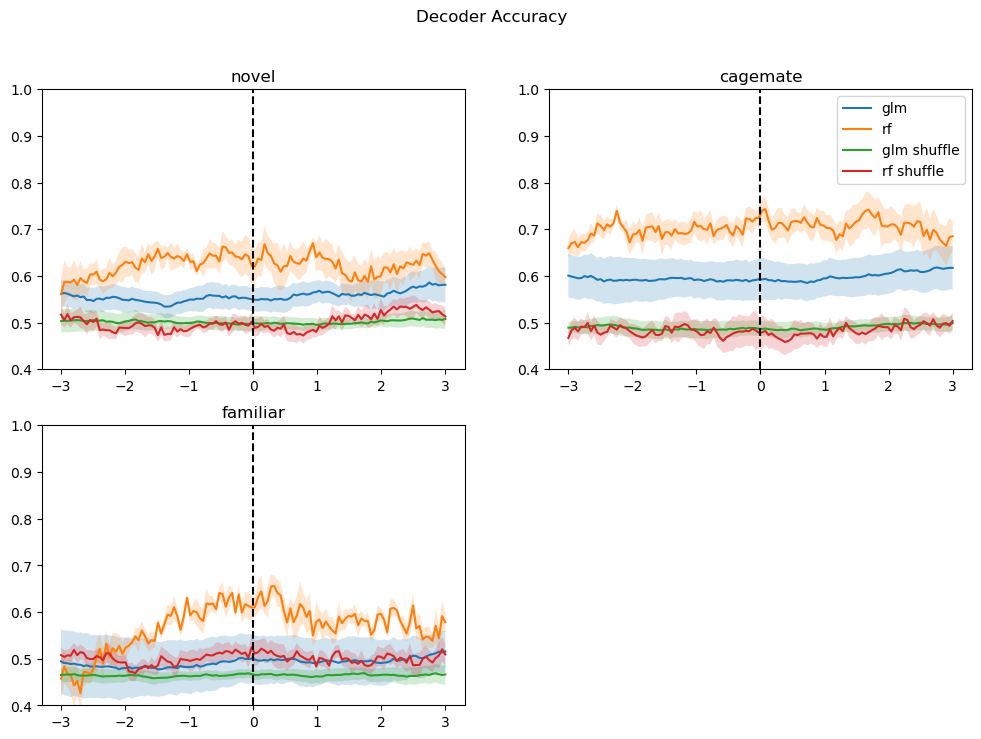

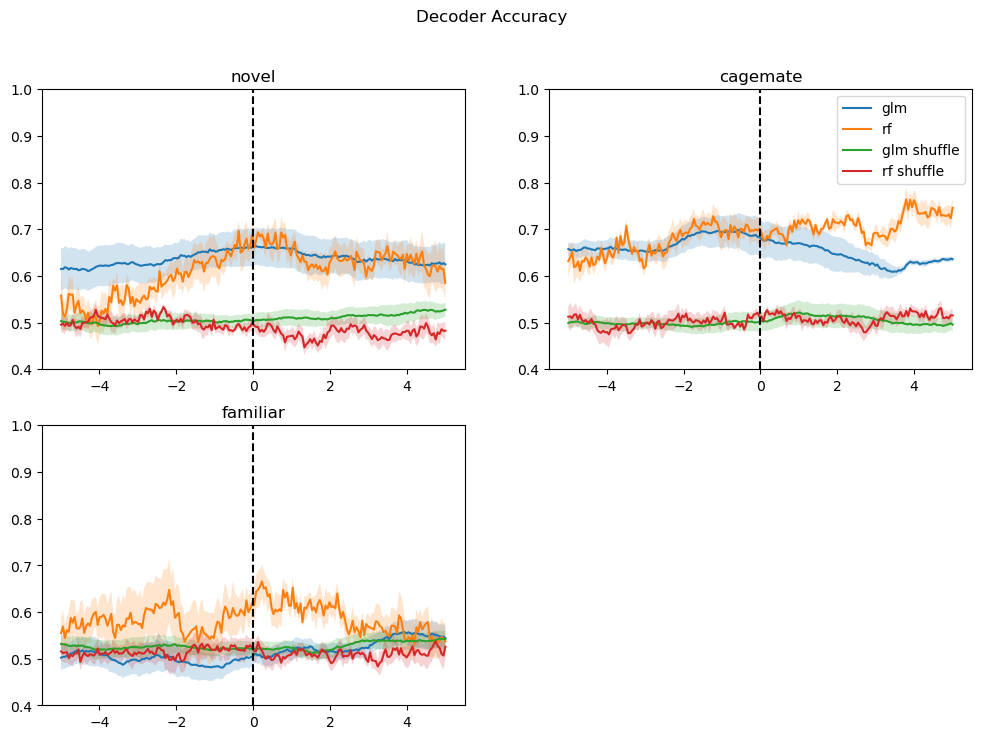

In [33]:
#sm_100_tb_50_3_3 = phase3_analysis.trial_decoder(equalize = 3, pre_window = 3, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, events = ['novel', 'cagemate', 'familiar'])
#sm_100_tb_50_5_5 = phase3_analysis.trial_decoder(equalize = 5, pre_window = 5, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, events = ['novel', 'cagemate', 'familiar'])


### 250 smoothing window 100 ms timebin 

In [221]:
phase3_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, 250, 100, 0.5)

All set to analyze


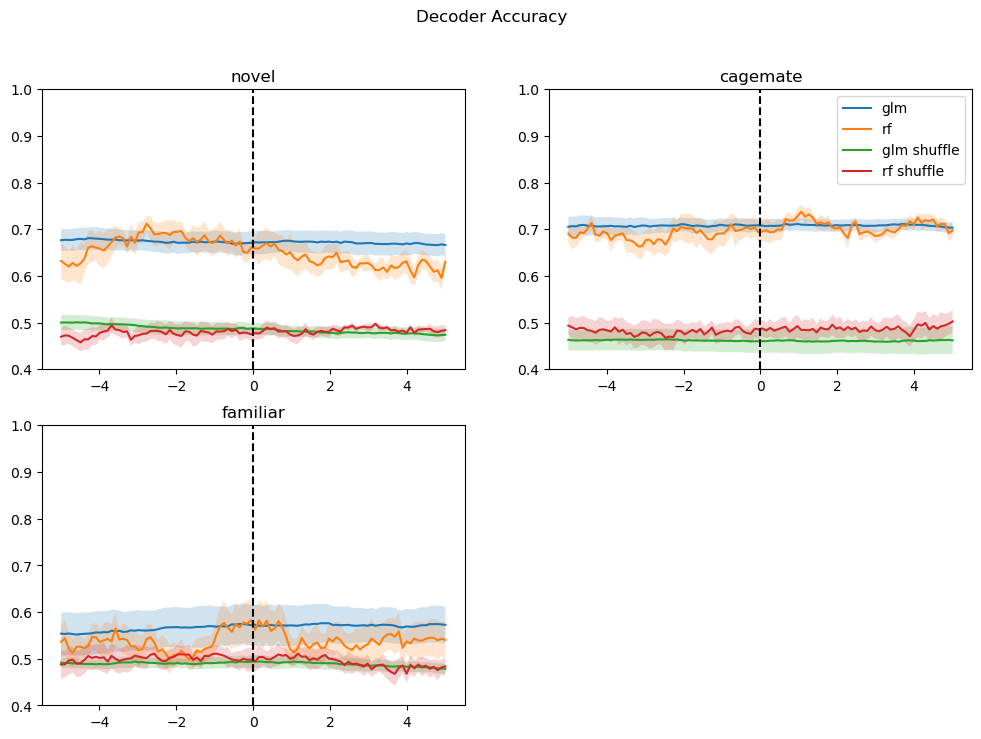

In [222]:

sm_250_tb_100_5_5 = phase3_analysis.trial_decoder(equalize = 5, pre_window = 5, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, events = ['novel', 'cagemate', 'familiar'])


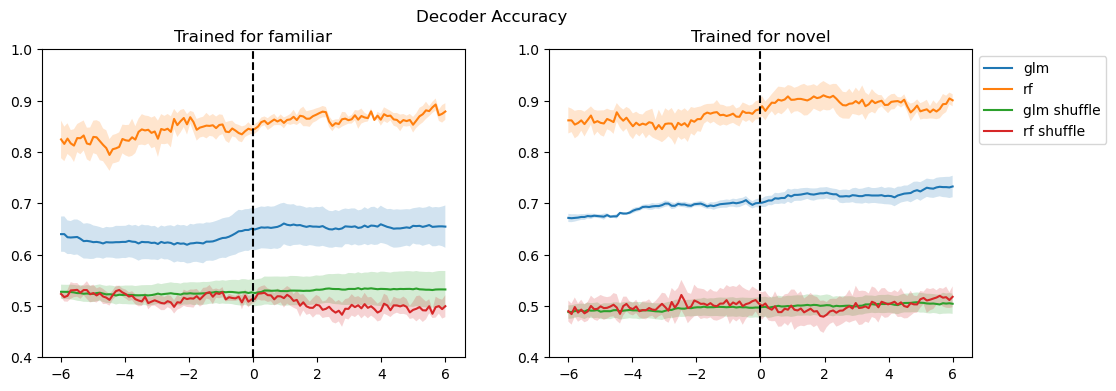

NameError: name 'pc' is not defined

In [225]:
nov_acq_v_fam_auc = cross_trial_decoder(equalize = 6, pre_window = 6, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, same_event='acquisition', event1='familiar', event2='novel')


In [226]:
nov_acq_v_fam_auc.keys()

dict_keys(['familiar', 'novel'])

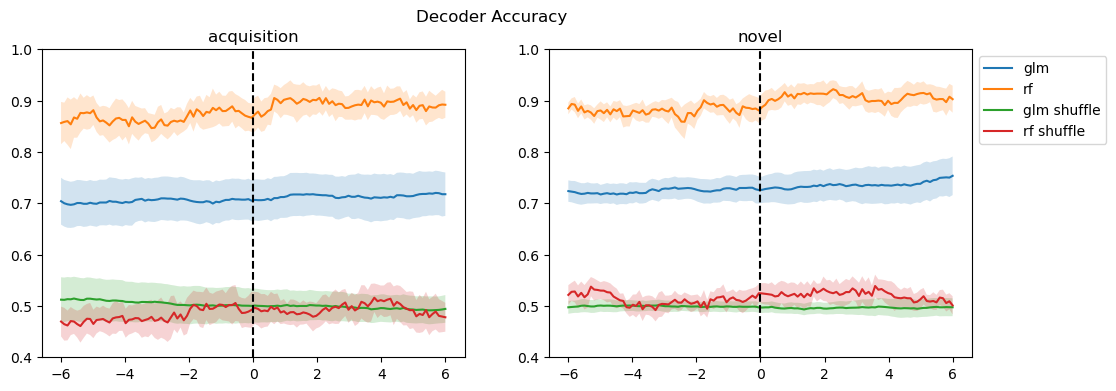

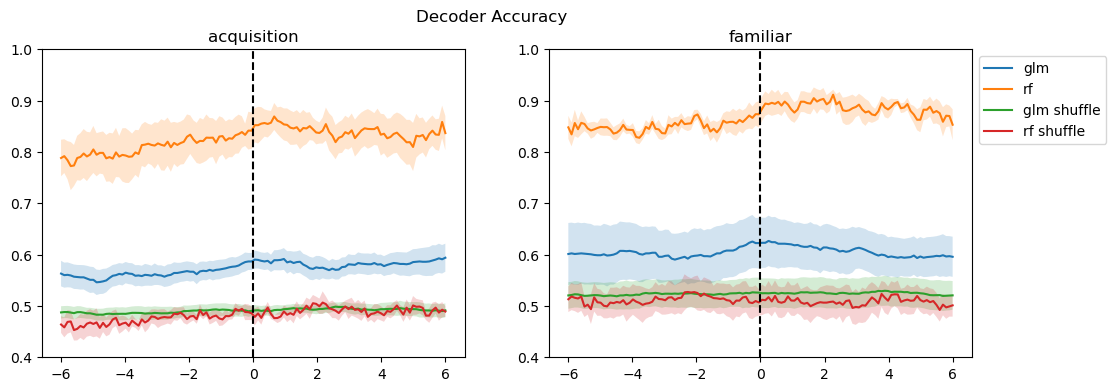

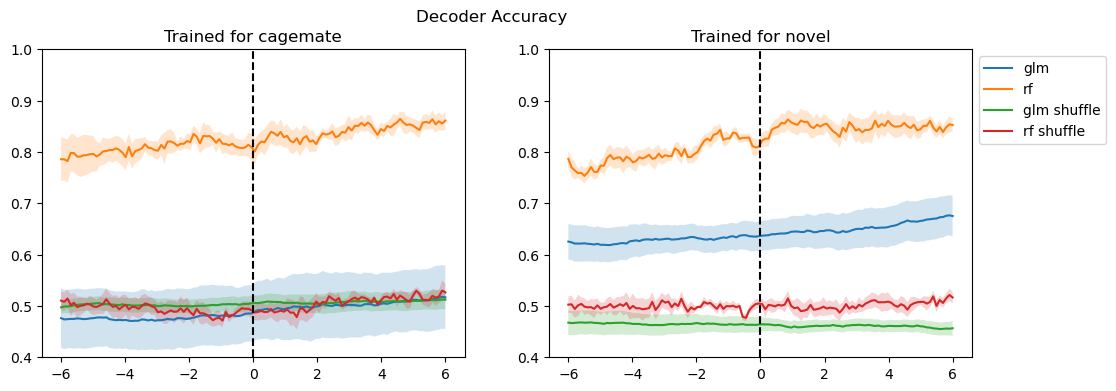

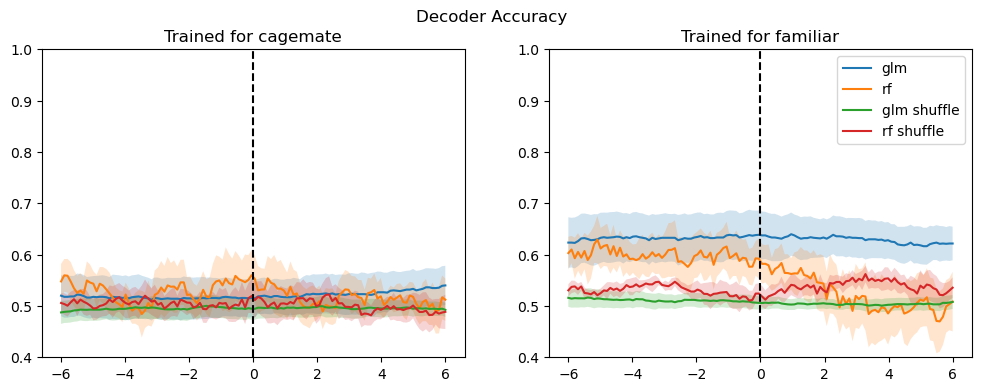

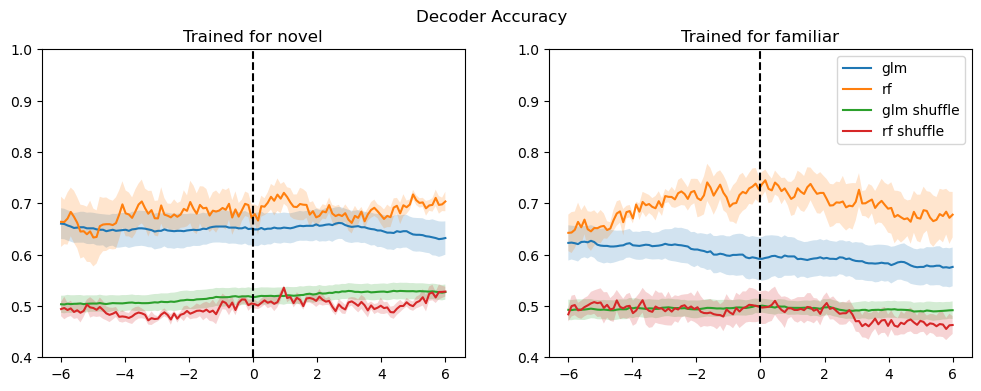

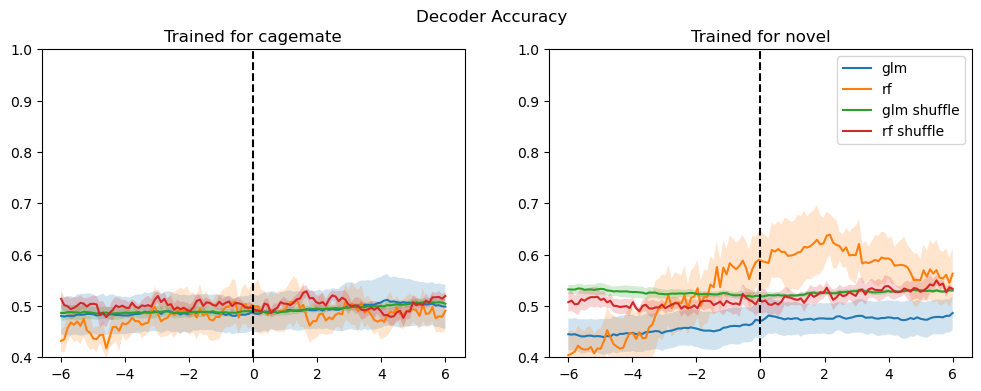

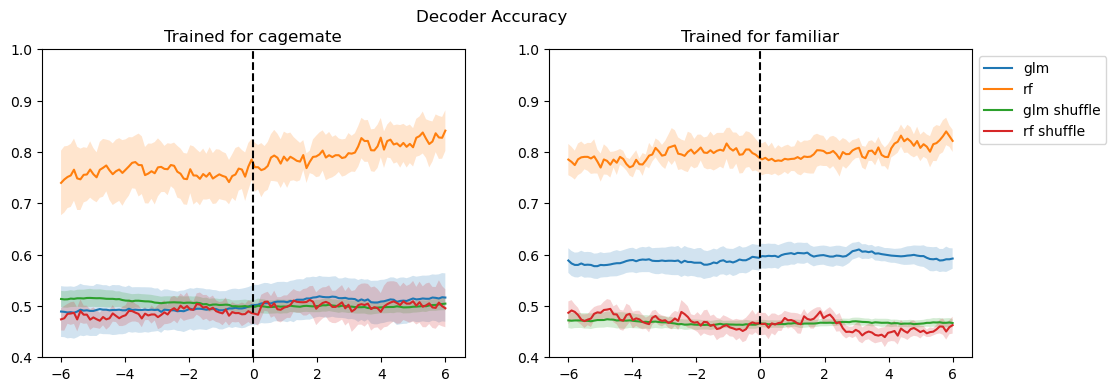

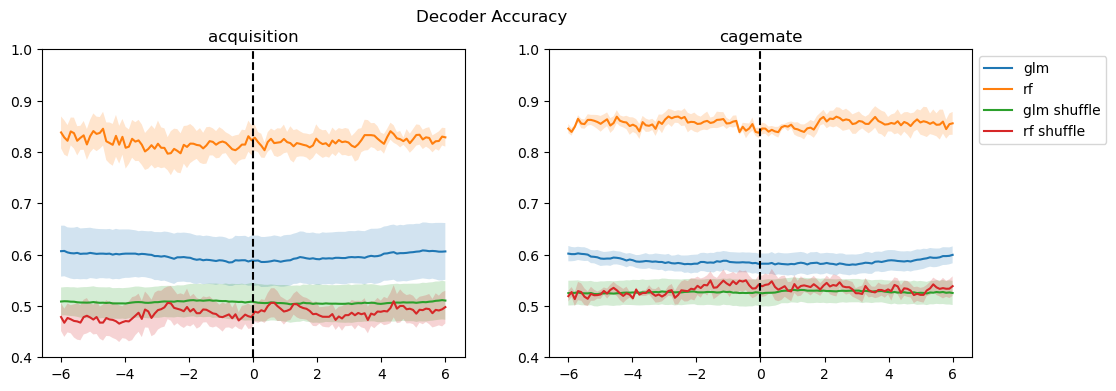

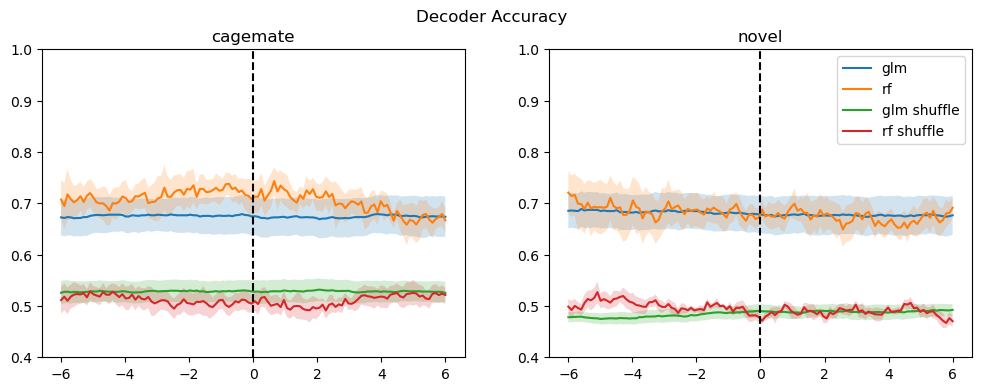

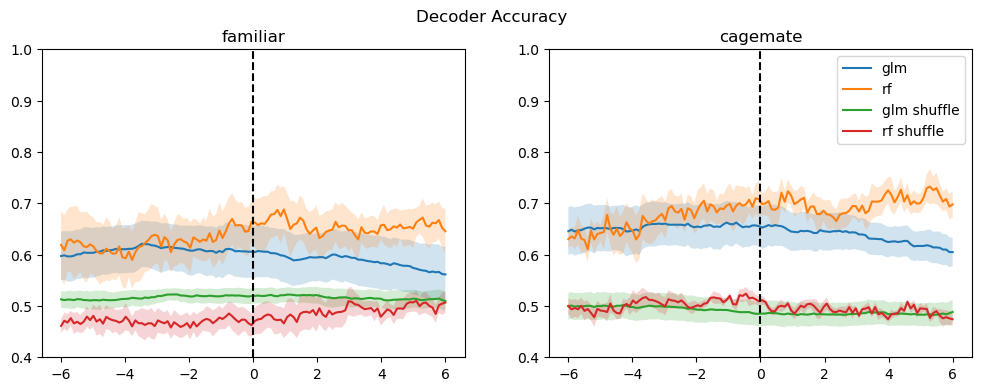

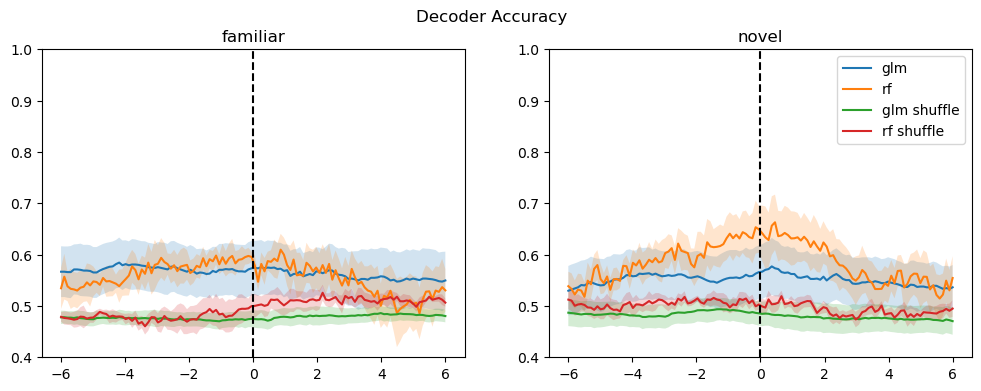

In [227]:
acq_nov = phase3_analysis.trial_decoder(equalize = 6, pre_window = 6, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, events = ['acquisition', 'novel'])
acq_fam = phase3_analysis.trial_decoder(equalize = 6, pre_window = 6, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, events = ['acquisition', 'familiar'])
nov_acq_v_fam_auc = cross_trial_decoder(equalize = 6, pre_window = 6, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, same_event='acquisition', event1='cagemate', event2='novel')
novel_v_fam = cross_trial_decoder(equalize = 6, pre_window = 6, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, same_event='novel', event1='cagemate', event2='familiar')
cagemate_v_other = cross_trial_decoder(equalize = 6, pre_window = 6, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, same_event='cagemate', event1='novel', event2='familiar')
familiar_v_other = cross_trial_decoder(equalize = 6, pre_window = 6, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, same_event='familiar', event1='cagemate', event2='novel')
acquisition_v_other = cross_trial_decoder(equalize = 6, pre_window = 6, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, same_event='acquisition', event1='cagemate', event2='familiar')
acq_vs_cagemate_baseline = phase3_analysis.trial_decoder(equalize = 6, pre_window = 6, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, events = ['acquisition','cagemate'])
cagemate_vs_novel_baseline = phase3_analysis.trial_decoder(equalize = 6, pre_window = 6, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, events = ['cagemate','novel'])
familiar_vs_cagemate_baseline = phase3_analysis.trial_decoder(equalize = 6, pre_window = 6, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, events = ['familiar','cagemate'])
familiar_vs_novel_baseline = phase3_analysis.trial_decoder(equalize = 6, pre_window = 6, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= 8, events = ['familiar','novel'])

### Fig1a. results plots

In [261]:
cagemate_vs_novel_baseline['cagemate'].keys()

dict_keys(['glm', 'rf', 'glm_shuffle', 'rf_shuffle'])

                                 Generalized\nLinear Model  \
cagemate novel  [-0.08417086093005786, 0.9369648576195864]   

                     Generalized\nLinear Model\nSHUFFLED  \
cagemate novel  [1.2702160927772237, 0.2728661106332307]   

                               Random Forest\nClassifier  \
cagemate novel  [0.8680114230813292, 0.4343625143804279]   

                                                Shuffled  
cagemate novel  [0.7086257506322547, 0.5176703742529984]  


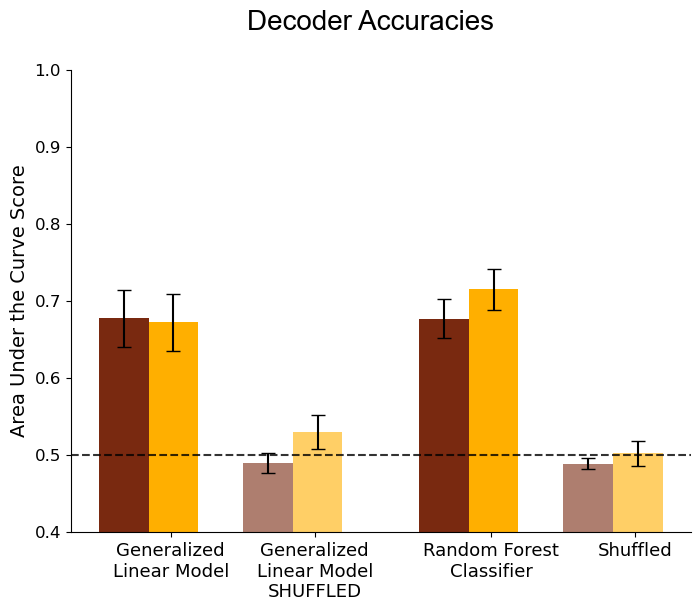

In [259]:
auc = cagemate_vs_novel_baseline
new_dict = collapsed_auc_dict(auc, 0, 3, 100, 6)

from scipy.stats import ttest_rel
pre_window = 5
equalize = 5
avg_auc = {}
i = 1
no_plots = len(new_dict.keys())
height_fig = no_plots//2
categories = ['cagemate', 'novel' ]  # Example categories
ttests = {}
for key in new_dict.keys():
    results = {}
    for pair in combinations(categories, 2):
        t_stat, p_value = ttest_rel(new_dict[key][pair[0]],new_dict[key][pair[1]])
        results[pair] = [t_stat, p_value]
    ttests[key] = results

ttess_df = pd.DataFrame.from_dict(ttests)

print(ttess_df)
categories = ['novel', 'cagemate']
avg_values = {category: [] for category in categories}
sem_values = {category: [] for category in categories}
for key in new_dict.keys():
    for category in categories:
        avg_values[category].append(np.mean(new_dict[key][category], axis=0))
        sem_values[category].append(sem(new_dict[key][category], axis=0))

bar_width = 0.31  # Width of each bar
x = np.arange(len(list(new_dict.keys())))  # x-axis positions
legend_labels = {category: [] for category in categories}
plt.figure(figsize=(8, 6))
col = [ hex_2_rgb('#792910'),(1.0, 0.6862745098039216, 0.0), hex_2_rgb('#15616F'), ]
spacing = [0, -0.1, 0 , -0.1]
for i, category in enumerate(categories):
    positions = x + (i -0.3) * bar_width  # Adjust positions for each category
    alphas = [1, 0.6, 1, 0.6]
    hatches = ['','//']
    for j, pos in enumerate(positions):
        bar = plt.bar(pos + spacing[j], avg_values[category][j], width=bar_width, yerr=sem_values[category][j],
                capsize=5, alpha=alphas[j], label=category if i == 0 else '', color = col[i])
plt.ylim(0.4, 1)
plt.yticks(fontsize=12)
plt.xticks(x + spacing+0.2, new_dict.keys(), fontsize = 13)
plt.axhline(y=0.5, color='black', linestyle='--', alpha = 0.8)
plt.ylabel('Area Under the Curve Score', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.suptitle('Decoder Accuracies', fontsize = 20, font = 'Arial')
plt.subplots_adjust(hspace=0.5)
plt.show()


dict_keys(['novel', 'familiar'])
                                Generalized\nLinear Model  \
familiar novel  [-1.0459112248281441, 0.3546397022672569]   

                      Generalized\nLinear Model\nSHUFFLED  \
familiar novel  [-1.0339058015628348, 0.3595899785765666]   

                               Random Forest\nClassifier  \
familiar novel  [0.8006696438734167, 0.4681806901486709]   

                                                  Shuffled  
familiar novel  [-0.7892856055996528, 0.47409751314531734]  


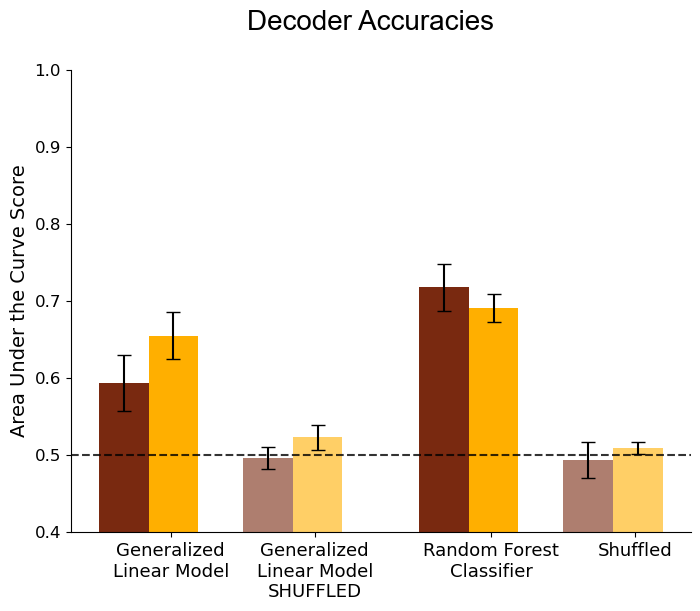

In [251]:

auc = cagemate_v_other
new_dict = collapsed_auc_dict(auc, 0, 3, 100, 6)
print(new_dict['Generalized\nLinear Model'].keys())

from scipy.stats import ttest_rel
pre_window = 5
equalize = 5
avg_auc = {}
i = 1
no_plots = len(new_dict.keys())
height_fig = no_plots//2
categories = ['familiar', 'novel']  # Example categories
ttests = {}
for key in new_dict.keys():
    results = {}
    for pair in combinations(categories, 2):
        t_stat, p_value = ttest_rel(new_dict[key][pair[0]],new_dict[key][pair[1]])
        results[pair] = [t_stat, p_value]
    ttests[key] = results

ttess_df = pd.DataFrame.from_dict(ttests)

print(ttess_df)
avg_values = {category: [] for category in categories}
sem_values = {category: [] for category in categories}
for key in new_dict.keys():
    for category in categories:
        avg_values[category].append(np.mean(new_dict[key][category], axis=0))
        sem_values[category].append(sem(new_dict[key][category], axis=0))

bar_width = 0.31  # Width of each bar
x = np.arange(len(list(new_dict.keys())))  # x-axis positions
legend_labels = {category: [] for category in categories}
plt.figure(figsize=(8, 6))
col = [ hex_2_rgb('#792910'),(1.0, 0.6862745098039216, 0.0), hex_2_rgb('#15616F'), ]
spacing = [0, -0.1, 0 , -0.1]
for i, category in enumerate(categories):
    positions = x + (i -0.3) * bar_width  # Adjust positions for each category
    alphas = [1, 0.6, 1, 0.6]
    hatches = ['','//']
    for j, pos in enumerate(positions):
        bar = plt.bar(pos + spacing[j], avg_values[category][j], width=bar_width, yerr=sem_values[category][j],
                capsize=5, alpha=alphas[j], label=category if i == 0 else '', color = col[i])
plt.ylim(0.4, 1)
plt.yticks(fontsize=12)
plt.xticks(x + spacing+0.2, new_dict.keys(), fontsize = 13)
plt.axhline(y=0.5, color='black', linestyle='--', alpha = 0.8)
plt.ylabel('Area Under the Curve Score', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.suptitle('Decoder Accuracies', fontsize = 20, font = 'Arial')
plt.subplots_adjust(hspace=0.5)
plt.show()


                                                                 Generalized\nLinear Model  \
novel vs long-term      short-term vs long-term   [0.3097706720344298, 0.7722024580774927]   
                        novel vs short-term      [5.357261157566929, 0.005857057629987541]   
short-term vs long-term novel vs short-term      [2.774581910395357, 0.050095429467754665]   

                                                                                 Shuffled   \
novel vs long-term      short-term vs long-term   [0.18979261112760096, 0.858713750782107]   
                        novel vs short-term        [1.45116525597865, 0.22035910210024404]   
short-term vs long-term novel vs short-term      [1.0542091986090845, 0.35125360455448545]   

                                                                  Random Forest\nClassifier  \
novel vs long-term      short-term vs long-term    [0.5603119021939734, 0.6051625189600999]   
                        novel vs short-term      [9.3176

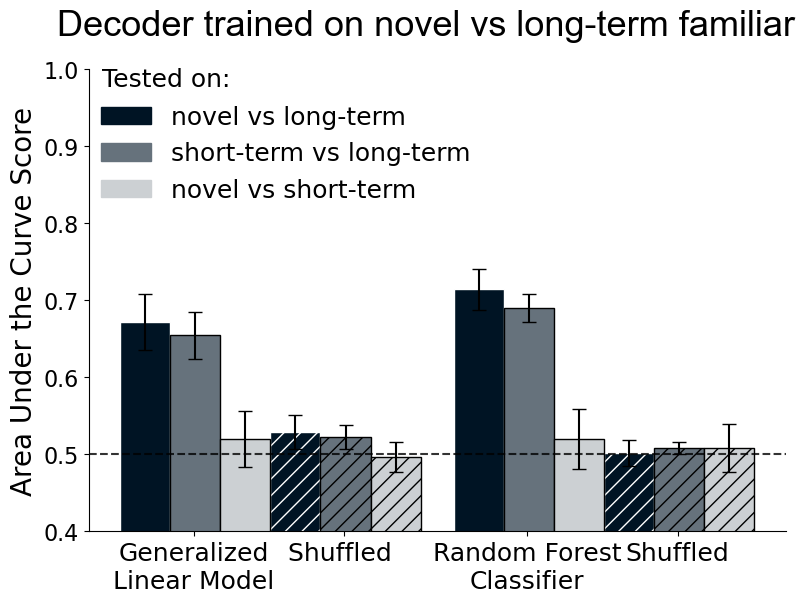

In [371]:
from scipy.stats import ttest_rel
import matplotlib.patches as mpatches

one_a_dict = {'novel vs long-term': cagemate_vs_novel_baseline['cagemate'], 
              'short-term vs long-term': cagemate_v_other['novel'],
              'novel vs short-term': novel_v_fam['cagemate']}

auc = one_a_dict
new_dict = collapsed_auc_dict(auc, 0, 3, 100, 6)
pre_window = 5
equalize = 5
avg_auc = {}
i = 1
no_plots = len(new_dict.keys())
height_fig = no_plots//2
categories = ['novel vs long-term', 'short-term vs long-term', 'novel vs short-term'] # Example categories
ttests = {}
for key in new_dict.keys():
    results = {}
    for pair in combinations(categories, 2):
        t_stat, p_value = ttest_rel(new_dict[key][pair[0]],new_dict[key][pair[1]])
        results[pair] = [t_stat, p_value]
    ttests[key] = results

ttess_df = pd.DataFrame.from_dict(ttests)

print(ttess_df)
avg_values = {category: [] for category in categories}
sem_values = {category: [] for category in categories}
for key in new_dict.keys():
    for category in categories:
        avg_values[category].append(np.mean(new_dict[key][category], axis=0))
        sem_values[category].append(sem(new_dict[key][category], axis=0))

bar_width = 0.3  # Width of each bar
x = np.arange(len(list(new_dict.keys())))  # x-axis positions
legend_labels = {category: [] for category in categories}
plt.figure(figsize=(9, 6))
col = [ hex_2_rgb('#001424'),hex_2_rgb('#66727c'), hex_2_rgb('#ccd0d3') ]
spacing = [0, -0.1, 0 , -0.1]
edge = ['white', 'black','black', 'black']
for i, category in enumerate(categories):
    positions = x + (i -0.3) * bar_width  # Adjust positions for each category
    alphas = [1, 1, 1, 1]
    hatches = ['','//','','//']
    for j, pos in enumerate(positions):
        bar = plt.bar(pos + spacing[j], avg_values[category][j], width=bar_width, yerr=sem_values[category][j],
                capsize=5, edgecolor=edge[i], alpha=alphas[j], label=category if i == 0 else '', color = col[i], hatch=hatches[j])
plt.ylim(0.4, 1)
plt.yticks(fontsize=16)
for i, color in enumerate(col):
    plt.plot([], [], color=color, label=categories[i], linewidth=5)  # Empty plots to create the legend
# Create handles for the legend (rectangles as pseudo bars)
legend_patches = [mpatches.Patch(color=col[i], label=categories[i]) for i in range(len(col))]
# Add the custom legend with rectangles as pseudo bars
legend = plt.legend(handles=legend_patches, fontsize = 18, frameon= False, bbox_to_anchor=(0.58,1.05), title = 'Tested on:')
legend.get_title().set_fontsize('18') 
legend.get_title().set_ha('left')
legend.get_title().set_position((-120, 1))
plt.xticks(x + spacing+0.2, new_dict.keys(), fontsize = 18)
plt.axhline(y=0.5, color='black', linestyle='--', alpha = 0.8)
plt.ylabel('Area Under the Curve Score', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.suptitle('Decoder trained on novel vs long-term familiar', fontsize = 26, font = 'Arial')
plt.subplots_adjust(hspace=0.5)
plt.show()

                                                                 Generalized\nLinear Model  \
novel vs long-term      short-term vs long-term    [0.4930255566921367, 0.647834353097531]   
                        novel vs short-term       [2.038785007556304, 0.11109696598882587]   
short-term vs long-term novel vs short-term      [2.1028956182343768, 0.10331508306937057]   

                                                                                 Shuffled   \
novel vs long-term      short-term vs long-term    [1.917074483901148, 0.1277009429047697]   
                        novel vs short-term        [1.659013163744028, 0.1724518407645261]   
short-term vs long-term novel vs short-term      [0.25133678853990554, 0.8139377361370153]   

                                                                 Random Forest\nClassifier  \
novel vs long-term      short-term vs long-term    [0.642879998123933, 0.5553004210109153]   
                        novel vs short-term      [4.331576

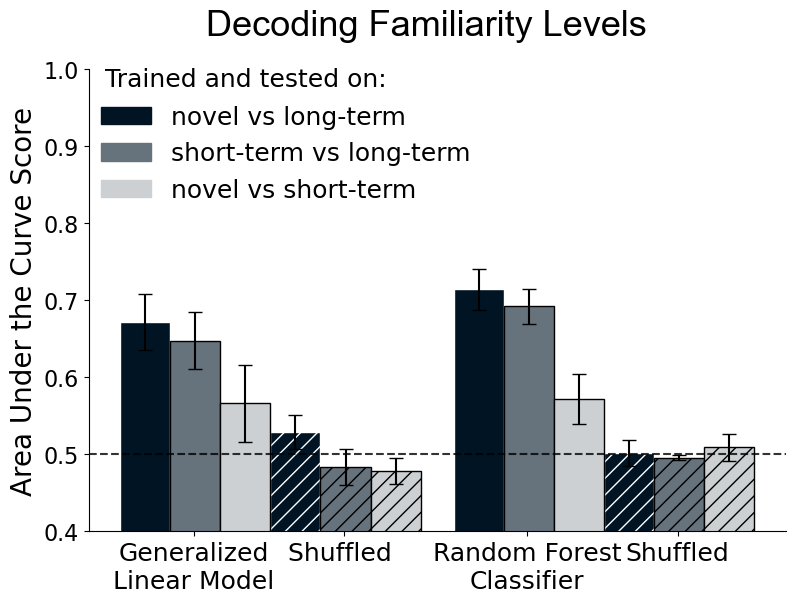

In [370]:

one_a_dict_baselines = {'novel vs long-term': cagemate_vs_novel_baseline['cagemate'], 
              'short-term vs long-term': familiar_vs_cagemate_baseline ['cagemate'],
              'novel vs short-term': familiar_vs_novel_baseline['familiar']}

auc = one_a_dict_baselines
new_dict = collapsed_auc_dict(auc, 0, 3, 100, 6)

from scipy.stats import ttest_rel
import matplotlib.patches as mpatches
pre_window = 5
equalize = 5
avg_auc = {}
i = 1
no_plots = len(new_dict.keys())
height_fig = no_plots//2
categories = ['novel vs long-term', 'short-term vs long-term', 'novel vs short-term'] # Example categories
ttests = {}
for key in new_dict.keys():
    results = {}
    for pair in combinations(categories, 2):
        t_stat, p_value = ttest_rel(new_dict[key][pair[0]],new_dict[key][pair[1]])
        results[pair] = [t_stat, p_value]
    ttests[key] = results

ttess_df = pd.DataFrame.from_dict(ttests)

print(ttess_df)
avg_values = {category: [] for category in categories}
sem_values = {category: [] for category in categories}
for key in new_dict.keys():
    for category in categories:
        avg_values[category].append(np.mean(new_dict[key][category], axis=0))
        sem_values[category].append(sem(new_dict[key][category], axis=0))

bar_width = 0.3  # Width of each bar
x = np.arange(len(list(new_dict.keys())))  # x-axis positions
legend_labels = {category: [] for category in categories}
plt.figure(figsize=(9, 6))
col = [ hex_2_rgb('#001424'),hex_2_rgb('#66727c'), hex_2_rgb('#ccd0d3') ]
spacing = [0, -0.1, 0 , -0.1]
edge = ['white', 'black','black', 'black']
for i, category in enumerate(categories):
    positions = x + (i -0.3) * bar_width  # Adjust positions for each category
    alphas = [1, 1, 1, 1]
    hatches = ['','//','','//']
    for j, pos in enumerate(positions):
        bar = plt.bar(pos + spacing[j], avg_values[category][j], width=bar_width, yerr=sem_values[category][j],
                capsize=5, edgecolor = edge[i], alpha=alphas[j], hatch = hatches[j], label=category if i == 0 else '', color = col[i])
plt.ylim(0.4, 1)
plt.yticks(fontsize=16)
for i, color in enumerate(col):
    plt.plot([], [], color=color, label=categories[i], linewidth=5)  # Empty plots to create the legend

# Create handles for the legend (rectangles as pseudo bars)
legend_patches = [mpatches.Patch(color=col[i], label=categories[i]) for i in range(len(col))]

# Add the custom legend with rectangles as pseudo bars
legend = plt.legend(handles=legend_patches, fontsize = 18, frameon= False, bbox_to_anchor=(0.58,1.05), title = 'Trained and tested on:')
legend.get_title().set_fontsize('18') 
legend.get_title().set_ha('left')
legend.get_title().set_position((-40, 1))
plt.xticks(x + spacing+0.2, new_dict.keys(), fontsize = 18)
plt.axhline(y=0.5, color='black', linestyle='--', alpha = 0.8)
plt.ylabel('Area Under the Curve Score', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.suptitle('Decoding Familiarity Levels', fontsize = 26, font = 'Arial')
plt.subplots_adjust(hspace=0.5)
plt.show()

dict_keys(['cagemate', 'familiar'])
                                   Generalized\nLinear Model  \
familiar cagemate  [2.0526722043534575, 0.10935802883321255]   

                       Generalized\nLinear Model\nSHUFFLED  \
familiar cagemate  [0.2947579373510222, 0.782843805549043]   

                                 Random Forest\nClassifier  \
familiar cagemate  [0.843711934170006, 0.4463322055900033]   

                                                    Shuffled  
familiar cagemate  [0.8303692187531533, 0.45301662733911424]  


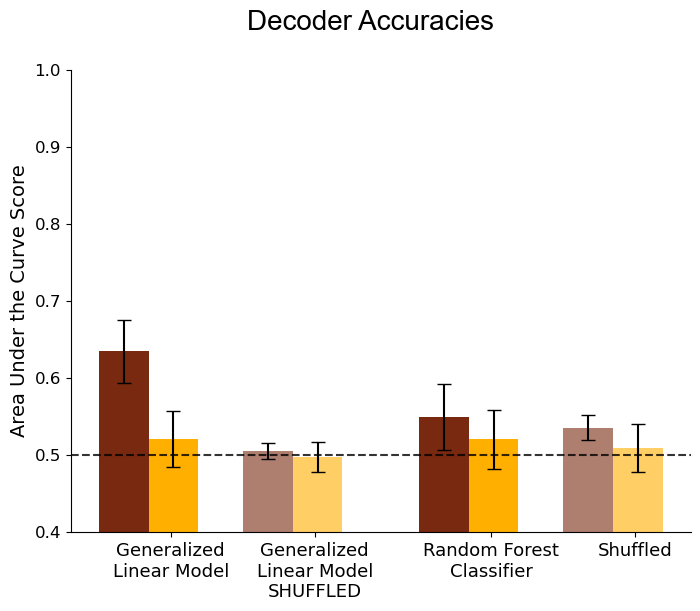

In [252]:


auc = novel_v_fam
new_dict = collapsed_auc_dict(auc, 0, 3, 100, 6)
print(new_dict['Generalized\nLinear Model'].keys())

from scipy.stats import ttest_rel
pre_window = 5
equalize = 5
avg_auc = {}
i = 1
no_plots = len(new_dict.keys())
height_fig = no_plots//2
categories = ['familiar', 'cagemate']  # Example categories
ttests = {}
for key in new_dict.keys():
    results = {}
    for pair in combinations(categories, 2):
        t_stat, p_value = ttest_rel(new_dict[key][pair[0]],new_dict[key][pair[1]])
        results[pair] = [t_stat, p_value]
    ttests[key] = results

ttess_df = pd.DataFrame.from_dict(ttests)

print(ttess_df)
avg_values = {category: [] for category in categories}
sem_values = {category: [] for category in categories}
for key in new_dict.keys():
    for category in categories:
        avg_values[category].append(np.mean(new_dict[key][category], axis=0))
        sem_values[category].append(sem(new_dict[key][category], axis=0))

bar_width = 0.31  # Width of each bar
x = np.arange(len(list(new_dict.keys())))  # x-axis positions
legend_labels = {category: [] for category in categories}
plt.figure(figsize=(8, 6))
col = [ hex_2_rgb('#792910'),(1.0, 0.6862745098039216, 0.0), hex_2_rgb('#15616F'), ]
spacing = [0, -0.1, 0 , -0.1]
for i, category in enumerate(categories):
    positions = x + (i -0.3) * bar_width  # Adjust positions for each category
    alphas = [1, 0.6, 1, 0.6]
    hatches = ['','//']
    for j, pos in enumerate(positions):
        bar = plt.bar(pos + spacing[j], avg_values[category][j], width=bar_width, yerr=sem_values[category][j],
                capsize=5, alpha=alphas[j], label=category if i == 0 else '', color = col[i])
plt.ylim(0.4, 1)
plt.yticks(fontsize=12)
plt.xticks(x + spacing+0.2, new_dict.keys(), fontsize = 13)
plt.axhline(y=0.5, color='black', linestyle='--', alpha = 0.8)
plt.ylabel('Area Under the Curve Score', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.suptitle('Decoder Accuracies', fontsize = 20, font = 'Arial')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [99]:
all_3_larger_timebins = {}
for pc in range(1,11):
        all_3_larger_timebins[pc] = phase3_analysis.trial_decoder(equalize = 5, pre_window = 5, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= pc, events = ['novel', 'cagemate', 'familiar'])

KeyboardInterrupt: 

In [374]:
agents_three = across_pcs_auc(all_3_larger_timebins, 0, 3, 100, 5)

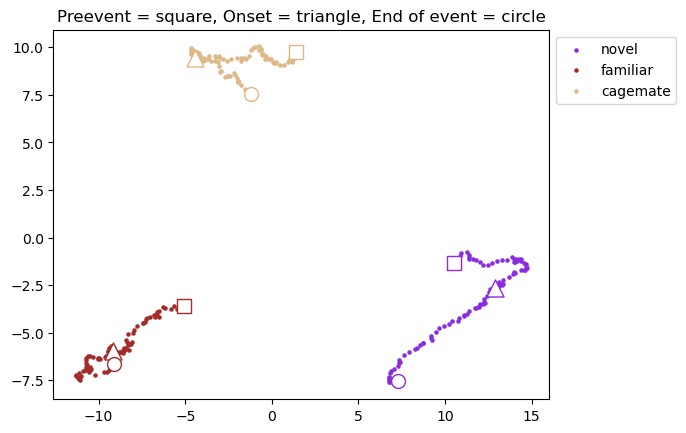

0.5032700167802402
0.8142988910232807
0.886963230067616
0.9375005800309868
0.9650180182856415
0.9766277271748067
0.9825202192975665
0.9865838352970874
0.9899479252439999
0.9916856751390497


In [95]:
id_pca_df, coeff, var = phase3_analysis.PCA_trajectories(5, 5, 0, events = ['novel', 'familiar', 'cagemate'])
total_variance = 0 
for variance in var[0:10]:
    total_variance =+ total_variance + variance
    print(total_variance)

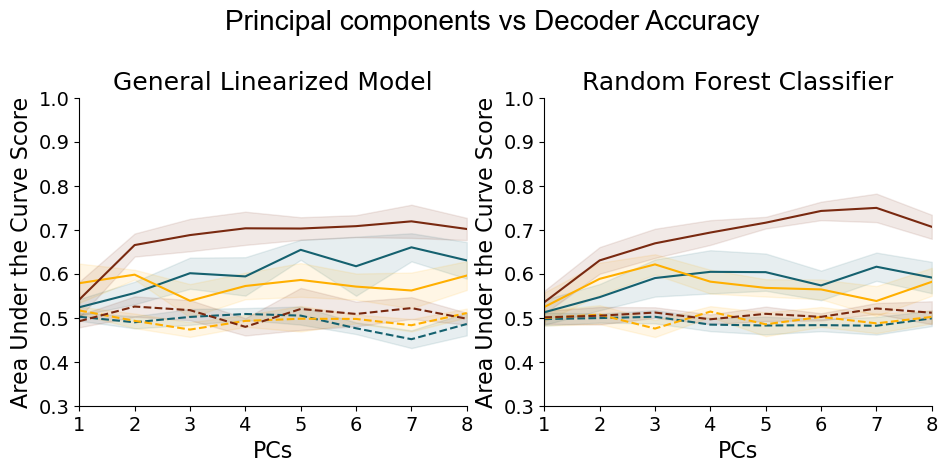

In [376]:

plt.figure(figsize=(11,4))
linestyle = ['-', '--','-', '--']
i = 0
subplots = [1,1,2,2]
for model in agents_three[1].keys():
    plt.subplot(1,2,subplots[i])
    novel_avg = []
    novel_sem = []
    cagemate_avg = []
    cagemate_sem = []
    familiar_avg = []
    familiar_sem = []
    for pc in agents_three.keys():
        novel_avg.append(np.mean(agents_three[pc][model]['novel'], axis = 0))
        novel_sem.append(sem(agents_three[pc][model]['novel']))
        cagemate_avg.append(np.mean(agents_three[pc][model]['cagemate'], axis = 0))
        cagemate_sem.append(sem(agents_three[pc][model]['cagemate']))
        familiar_avg.append(np.mean(agents_three[pc][model]['familiar'], axis = 0))
        familiar_sem.append(sem(agents_three[pc][model]['familiar']))
    x = list(agents_three.keys())
    plt.plot(x, novel_avg, label ='novel', color=hex_2_rgb('#15616F'), linestyle = linestyle[i])
    plt.fill_between(x, np.array(novel_avg)-np.array(novel_sem), np.array(novel_avg)+np.array(novel_sem),color=hex_2_rgb('#15616F'), alpha= alpha)
    plt.plot(x, familiar_avg, label = 'familiar', color = (1.0, 0.6862745098039216, 0.0), linestyle = linestyle[i])
    plt.fill_between(x, np.array(familiar_avg)-np.array(familiar_sem), np.array(familiar_avg)+np.array(familiar_sem), color = (1.0, 0.6862745098039216, 0.0), alpha = alpha)
    plt.plot(x, cagemate_avg, label = 'cagemate', color=hex_2_rgb('#792910'), linestyle = linestyle[i])
    plt.fill_between(x, np.array(cagemate_avg)-cagemate_sem, np.array(cagemate_avg)+np.array(cagemate_sem),color=hex_2_rgb('#792910'), alpha = alpha)
    plt.ylim(0.3, 1)
    plt.xlim(1,8)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('PCs', fontsize=16)
    plt.ylabel('Area Under the Curve Score', fontsize=16)
    plt.axvline(x=0, color='k', linestyle='--')
    if subplots[i] == 1:
        plt.title('General Linearized Model', fontsize = 18)
    else:
        plt.title('Random Forest Classifier', fontsize = 18)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    i +=1
plt.suptitle('Principal components vs Decoder Accuracy', fontsize = 20, font = 'Arial', y = 1.1)
plt.show()


In [373]:
all_4_larger_timebins = {}
for pc in range(1,9):
        all_4_larger_timebins[pc] = phase3_analysis.trial_decoder(equalize = 5, pre_window = 5, post_window = 0, num_fold=5, num_shuffle=5, no_PCs= pc, events = ['acquisition', 'novel', 'cagemate', 'familiar'])

KeyboardInterrupt: 

### Plotting functions

In [65]:
# with open('phase3_auc.pkl','wb') as file:
#     pickle.dump(auc, file)
with open('phase3_auc.pkl', 'rb') as file:
    auc = pickle.load(file)
# #this one is run on a pca emnedding of acquisition, empty, cagemate, novel, familiar ONLY
# refined_auc = phase3_analysis.trial_decoder(5,5,post_window = 0, num_fold=5, num_shuffle=5, no_PCs=8,
#                                             events = ['novel', 'familiar', 'cagemate'])
# identity_auc = phase3_analysis.trial_decoder(5,5,post_window = 0, num_fold=5, num_shuffle=5, no_PCs=8,
#                                             events = ['novel', 'familiar', 'acquisition'])

# with open('refined_auc_phase3.pkl', 'wb') as file:
#     pickle.dump(refined_auc, file)
# with open('identity_auc_phase3.pkl', 'wb') as file:
#     pickle.dump(identity_auc, file)

with open('refined_auc_phase3.pkl', 'rb') as file:
    refined_auc = pickle.load(file)
with open('identity_auc_phase3.pkl', 'rb') as file:
    identity_auc = pickle.load(file)

In [280]:


def collapsed_auc_dict(auc_dict, t1, t2, timebin, pre_window):
    collapsed_auc_dict_dict = {}
    glm = {}
    glm_shuffle = {}
    rf = {}
    rf_shuffle = {}
    t1 = int((t1 + pre_window) * 1000 / timebin)
    t2 = int((t2 + pre_window) * 1000 / timebin)
    for key in auc_dict.keys():
        glm_across_time = np.array(auc_dict[key]['glm'])
        glm_trimmed = glm_across_time[:, t1:t2]
        # glm across time = fold x timebins 
        glm[key] = np.mean(glm_trimmed, axis =1)
        rf_across_time = np.array(auc_dict[key]['rf'])
        rf_trimmed = rf_across_time[:, t1:t2]
        rf[key] =  np.mean(rf_trimmed, axis =1)
        glm_shuffle_temp = []
        rf_shuffle_temp = []
        for i in range(5):
            glm_shuffle_across_time = np.array(auc_dict[key]['glm_shuffle'][i])
            glm_shuffle_trimmed = glm_shuffle_across_time[:, t1:t2]
            glm_shuffle_temp.append(np.mean(glm_shuffle_trimmed, axis = 1))
            rf_shuffle_across_time = np.array(auc_dict[key]['rf_shuffle'][i])
            rf_shuffle_trimmed = rf_shuffle_across_time[:, t1:t2]
            rf_shuffle_temp.append(np.mean(rf_shuffle_trimmed, axis = 1))
        glm_shuffle[key] = np.mean(np.array(glm_shuffle_temp), axis = 1)
        rf_shuffle[key] = np.mean(np.array(rf_shuffle_temp), axis = 1)
    collapsed_auc_dict_dict = {'Generalized\nLinear Model':glm,'Shuffled ':glm_shuffle,
                    'Random Forest\nClassifier':rf,'Shuffled':rf_shuffle}
    return collapsed_auc_dict_dict 



def across_pcs_auc_dict(auc_dict, t1, t2, timebin, pre_window):
    pc_dict = {}
    for pc in auc_dict.keys():
        pc_dict[pc] = collapsed_auc_dict(auc_dict[pc], t1, t2, timebin, pre_window)
    return pc_dict

                   
    

In [278]:
new_dict = collapsed_auc_dict(auc, 0, 3, 100, 5)


### Across PC plot

In [217]:

pre_window = 5
equalize = 5

no_plots = len(new_dict.keys())
height_fig = math.ceil(no_plots/2)
i = 1
alpha = 0.1
plt.figure(figsize=(10,4*height_fig))
plt.figure(figsize=(10,4))
for key in pc_dict.keys():
    for key in new_dict.keys():
        
        novel_avg.append (np.mean(new_dict[key]['novel'], axis = 0))
        novel_sem.append(sem(new_dict[key]['novel'], axis = 0))
        cagemate_avg.append(np.mean(new_dict[key]['cagemate'], axis = 0))
        cagemate_sem.append(sem(new_dict[key]['cagemate'], axis = 0))
        familiar_avg.append(np.mean(new_dict[key]['familiar'], axis = 0))
        familiar_sem.append(sem(new_dict[key]['familiar'], axis = 0))
        
    plt.subplot(height_fig,2,i)
    plt.subplot(1,2,i)
    plt.plot(x, novel_avg, label ='novel', color=hex_2_rgb('#15616F'))
    plt.fill_between(x, novel_avg-novel_sem, novel_avg+novel_sem,color=hex_2_rgb('#15616F'), alpha= alpha)
    plt.plot(x, familiar_avg, label = 'familiar', color = (1.0, 0.6862745098039216, 0.0))
    plt.fill_between(x, familiar_avg-familiar_sem, familiar_avg+familiar_sem, color = (1.0, 0.6862745098039216, 0.0), alpha = alpha)
    plt.plot(x, cagemate_avg, label = 'cagemate', color=hex_2_rgb('#792910'))
    plt.fill_between(x, cagemate_avg-cagemate_sem, cagemate_avg+cagemate_sem,color=hex_2_rgb('#792910'), alpha = alpha)
    plt.plot(x, novelshuf_avg, label ='novel shuffled',  linestyle='--', color=hex_2_rgb('#15616F'))
    plt.fill_between(x, novelshuf_avg-novelshuf_sem, novelshuf_avg+novelshuf_sem,color=hex_2_rgb('#15616F'), alpha= alpha)
    plt.plot(x, familiarshuf_avg, label = 'familiar shuffled', linestyle='--',  color = (1.0, 0.6862745098039216, 0.0))
    plt.fill_between(x, familiarshuf_avg-familiarshuf_sem, familiarshuf_avg+familiarshuf_sem, color = (1.0, 0.6862745098039216, 0.0), alpha = alpha)
    plt.plot(x, cagemateshuf_avg, label = 'cagemate shuffled',  linestyle='--', color=hex_2_rgb('#792910'))
    plt.fill_between(x, cagemateshuf_avg-cagemateshuf_sem, cagemateshuf_avg+cagemateshuf_sem, color=hex_2_rgb('#792910'), alpha = alpha)
    plt.title(f'{key}', fontsize = 16)
    plt.ylim(.4, 1)
    plt.xlim(-5,5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Time to investigation onset', fontsize=14)
    plt.ylabel('Area Under the Curve Score', fontsize=14)
    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    if i ==2:
        plt.legend(bbox_to_anchor = (1.07,.75), frameon=False)
    i += 1
plt.suptitle('Constrained: Social Recognition', fontsize = 20, font = 'Arial', x = .6, y = 1.1)
plt.subplots_adjust(wspace=0.3)
plt.show()

NameError: name 'pc_dict' is not defined

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

### Bar graph 

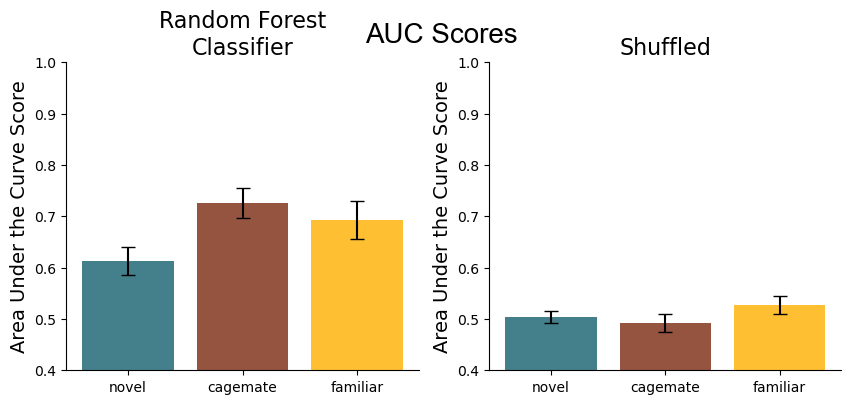

In [218]:

pre_window = 5
equalize = 5
avg_auc = {}
i = 1
no_plots = len(new_dict.keys())
height_fig = no_plots//2
i = 1
plt.figure(figsize=(10,4*height_fig))
for key in new_dict.keys():
    plt.subplot(height_fig,2,i)
    novel_avg = np.mean(new_dict[key]['novel'], axis = 0)
    novel_sem = sem(new_dict[key]['novel'], axis = 0)
    cagemate_avg = np.mean(new_dict[key]['cagemate'], axis = 0)
    cagemate_sem = sem(new_dict[key]['cagemate'], axis = 0)
    familiar_avg = np.mean(new_dict[key]['familiar'], axis = 0)
    familiar_sem = sem(new_dict[key]['familiar'], axis = 0)
    plt.bar(['novel', 'cagemate', 'familiar'], [novel_avg, cagemate_avg, 
                                                         familiar_avg], yerr =
                                                         ([novel_sem, cagemate_sem, familiar_sem]), 
                                                         capsize =5, alpha=0.8, color = [hex_2_rgb('#15616F'), hex_2_rgb('#792910'),(1.0, 0.6862745098039216, 0.0) ] )
    plt.title(f'{key}', fontsize = 16)
    plt.ylim(.4, 1)
    plt.ylabel('Area Under the Curve Score', fontsize=14)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    i += 1
plt.suptitle('AUC Scores', fontsize = 20, font = 'Arial')
plt.subplots_adjust(hspace=0.5)
plt.show()



In [219]:
from scipy.stats import ttest_rel
pre_window = 5
equalize = 5
avg_auc = {}
i = 1
no_plots = len(new_dict.keys())
height_fig = no_plots//2
categories = ['cagemate', 'familiar','novel' ]  # Example categories
ttests = {}
for key in new_dict.keys():
    results = {}
    for pair in combinations(categories, 2):
        t_stat, p_value = ttest_rel(new_dict[key][pair[0]],new_dict[key][pair[1]])
        results[pair] = [t_stat, p_value]
    ttests[key] = results

ttess_df = pd.DataFrame.from_dict(ttests)

ttess_df

Random Forest\nClassifier  \
cagemate familiar    [0.5700538042708597, 0.5991329325236742]   
         novel     [3.4570627170024864, 0.025887025268774056]   
familiar novel       [1.2812588947340393, 0.2693383217493318]   

                                                    Shuffled  
cagemate familiar  [-1.0466579678092307, 0.3543337994935023]  
         novel     [-0.6501034387487714, 0.5510746825131874]  
familiar novel     [1.1395499307523675, 0.31808088281879016]

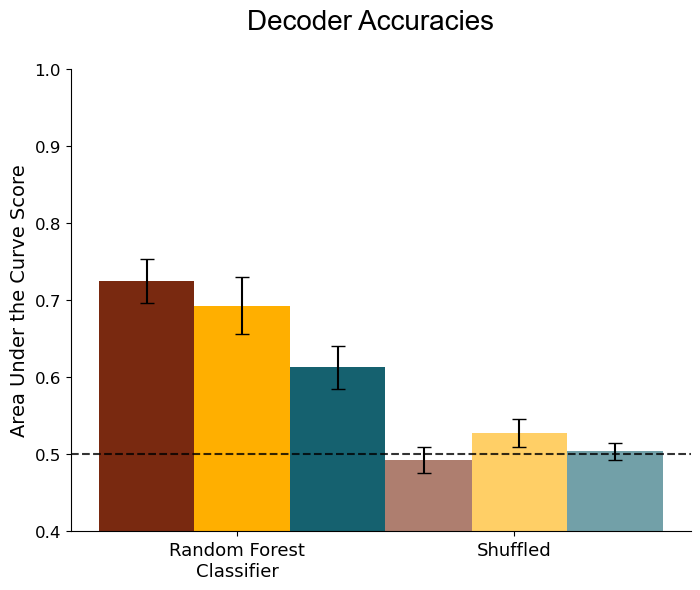

In [220]:
avg_values = {category: [] for category in categories}
sem_values = {category: [] for category in categories}
for key in new_dict.keys():
    for category in categories:
        avg_values[category].append(np.mean(new_dict[key][category], axis=0))
        sem_values[category].append(sem(new_dict[key][category], axis=0))

bar_width = 0.31  # Width of each bar
x = np.arange(len(list(new_dict.keys())))  # x-axis positions
legend_labels = {category: [] for category in categories}
plt.figure(figsize=(8, 6))
col = [ hex_2_rgb('#792910'),(1.0, 0.6862745098039216, 0.0), hex_2_rgb('#15616F'), ]
spacing = [0, -0.1]
for i, category in enumerate(categories):
    positions = x + (i -0.3) * bar_width  # Adjust positions for each category
    alphas = [1, 0.6]
    hatches = ['','//']
    for j, pos in enumerate(positions):
        bar = plt.bar(pos + spacing[j], avg_values[category][j], width=bar_width, yerr=sem_values[category][j],
                capsize=5, alpha=alphas[j], label=category if i == 0 else '', color = col[i])
plt.ylim(0.4, 1)
plt.yticks(fontsize=12)
plt.xticks(x + spacing+0.2, new_dict.keys(), fontsize = 13)
plt.axhline(y=0.5, color='black', linestyle='--', alpha = 0.8)
plt.ylabel('Area Under the Curve Score', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.suptitle('Decoder Accuracies', fontsize = 20, font = 'Arial')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:


glm = {}
glm_shuffle = {}
rf = {}
rf_shuffle = {}
for key in auc.keys():
    glm= auc[key]['glm']
    glm
    rf[key] = auc[key]['rf']
    glm_shuffle_temp = []
    rf_shuffle_temp = []
    for i in range(5):
        glm_shuffle_temp.append(auc[key]['glm_shuffle'][i])
        rf_shuffle_temp.append(auc[key]['rf_shuffle'][i])
    glm_shuffle[key] = np.array(glm_shuffle_temp).reshape(25,100)
    rf_shuffle[key] = np.array(rf_shuffle_temp).reshape(25,100)
model_dict = {'Generalized Linear Model':glm, 'Random Forest Classifier':rf,
              'Generalized Linear Model\nSHUFFLED':glm_shuffle, 
              'Random Forest Classifier\nSHUFFLED':rf_shuffle}
pre_window = 5
equalize = 5
avg_auc = {}
no_plots = len(model_dict.keys())
height_fig = math.ceil(no_plots/2)
i = 1
alpha = 0.1
plt.figure(figsize=(10,4*height_fig))
for key in model_dict.keys():
    novel_avg = np.mean(model_dict[key]['novel'], axis = 0)
    novel_sem = sem(model_dict[key]['novel'], axis = 0)
    x =np.linspace(-pre_window, equalize, len(novel_avg))
    cagemate_avg = np.mean(model_dict[key]['cagemate'], axis = 0)
    cagemate_sem = sem(model_dict[key]['cagemate'], axis = 0)
    familiar_avg = np.mean(model_dict[key]['familiar'], axis = 0)
    familiar_sem = sem(model_dict[key]['familiar'], axis = 0)
    empty_avg = np.mean(model_dict[key]['empty'], axis = 0)
    empty_sem = sem(model_dict[key]['empty'], axis = 0)
    plt.subplot(height_fig,2,i)
    plt.plot(x, novel_avg, label ='novel', color=hex_2_rgb('#15616F'))
    plt.fill_between(x, novel_avg-novel_sem, novel_avg+novel_sem,color=hex_2_rgb('#15616F'), alpha= alpha)
    plt.plot(x, familiar_avg, label = 'familiar', color = (1.0, 0.6862745098039216, 0.0))
    plt.fill_between(x, familiar_avg-familiar_sem, familiar_avg+familiar_sem, color = (1.0, 0.6862745098039216, 0.0), alpha = alpha)
    plt.plot(x, cagemate_avg, label = 'cagemate', color=hex_2_rgb('#792910'))
    plt.fill_between(x, cagemate_avg-cagemate_sem, cagemate_avg+cagemate_sem,color=hex_2_rgb('#792910'), alpha = alpha)
    plt.plot(x, empty_avg, label =  'empty',  color=hex_2_rgb('#001424'))
    plt.fill_between(x, empty_avg-empty_sem, empty_avg+empty_sem, color=hex_2_rgb('#001424'), alpha = alpha)
    plt.title(f'{key}', fontsize = 16)
    plt.ylim(.4, 1)
    plt.xlim(-5,5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Time to sniff onset', fontsize=14)
    plt.ylabel('Area Under the Curve Score', fontsize=14)
    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend(bbox_to_anchor=(1,1))
    i += 1
plt.suptitle('Phase 2: Decoder Accuracy', fontsize = 20, font = 'Arial')
plt.subplots_adjust(hspace=0.5)
plt.show()


In [ ]:
glm = {}
glm_shuffle = {}
rf = {}
rf_shuffle = {}
for key in refined_auc.keys():
    glm[key] = refined_auc[key]['glm']
    rf[key] = refined_auc[key]['rf']
    glm_shuffle_temp = []
    rf_shuffle_temp = []
    for i in range(5):
        glm_shuffle_temp.append(refined_auc[key]['glm_shuffle'][i])
        rf_shuffle_temp.append(refined_auc[key]['rf_shuffle'][i])
    glm_shuffle[key] = np.array(glm_shuffle_temp).reshape(25,100)
    rf_shuffle[key] = np.array(rf_shuffle_temp).reshape(25,100)
model_dict = {'Generalized Linear Model':glm, 'Random Forest Classifier':rf,
              'Generalized Linear Model\nSHUFFLED':glm_shuffle, 
              'Random Forest Classifier\nSHUFFLED':rf_shuffle}
pre_window = 5
equalize = 5
avg_refined_auc = {}
no_plots = len(model_dict.keys())
height_fig = math.ceil(no_plots/2)
i = 1
alpha = 0.1
plt.figure(figsize=(10,4*height_fig))
plt.figure(figsize=(10,4))
for key in ['Generalized Linear Model', 'Random Forest Classifier']:
    novel_avg = np.mean(model_dict[key]['novel'], axis = 0)
    novel_sem = sem(model_dict[key]['novel'], axis = 0)
    x =np.linspace(-pre_window, equalize, len(novel_avg))
    cagemate_avg = np.mean(model_dict[key]['cagemate'], axis = 0)
    cagemate_sem = sem(model_dict[key]['cagemate'], axis = 0)
    familiar_avg = np.mean(model_dict[key]['familiar'], axis = 0)
    familiar_sem = sem(model_dict[key]['familiar'], axis = 0)
    if key == 'Generalized Linear Model':
        shuffle_key = 'Generalized Linear Model\nSHUFFLED'
    else:
        shuffle_key = 'Random Forest Classifier\nSHUFFLED'
    novelshuf_avg = np.mean(model_dict[shuffle_key]['novel'], axis = 0)
    novelshuf_sem = sem(model_dict[shuffle_key]['novel'], axis = 0)
    x =np.linspace(-pre_window, equalize, len(novelshuf_avg))
    cagemateshuf_avg = np.mean(model_dict[shuffle_key]['cagemate'], axis = 0)
    cagemateshuf_sem = sem(model_dict[shuffle_key]['cagemate'], axis = 0)
    familiarshuf_avg = np.mean(model_dict[shuffle_key]['familiar'], axis = 0)
    familiarshuf_sem = sem(model_dict[shuffle_key]['familiar'], axis = 0)
    plt.subplot(1,2,i)
    plt.plot(x, novel_avg, label ='novel', color=hex_2_rgb('#15616F'))
    plt.fill_between(x, novel_avg-novel_sem, novel_avg+novel_sem,color=hex_2_rgb('#15616F'), alpha= alpha)
    plt.plot(x, familiar_avg, label = 'familiar', color = (1.0, 0.6862745098039216, 0.0))
    plt.fill_between(x, familiar_avg-familiar_sem, familiar_avg+familiar_sem, color = (1.0, 0.6862745098039216, 0.0), alpha = alpha)
    plt.plot(x, cagemate_avg, label = 'cagemate', color=hex_2_rgb('#792910'))
    plt.fill_between(x, cagemate_avg-cagemate_sem, cagemate_avg+cagemate_sem,color=hex_2_rgb('#792910'), alpha = alpha)
    plt.plot(x, novelshuf_avg, label ='novel shuffled',  linestyle='--', color=hex_2_rgb('#15616F'))
    plt.fill_between(x, novelshuf_avg-novelshuf_sem, novelshuf_avg+novelshuf_sem,color=hex_2_rgb('#15616F'), alpha= alpha)
    plt.plot(x, familiarshuf_avg, label = 'familiar shuffled', linestyle='--',  color = (1.0, 0.6862745098039216, 0.0))
    plt.fill_between(x, familiarshuf_avg-familiarshuf_sem, familiarshuf_avg+familiarshuf_sem, color = (1.0, 0.6862745098039216, 0.0), alpha = alpha)
    plt.plot(x, cagemateshuf_avg, label = 'cagemate shuffled',  linestyle='--', color=hex_2_rgb('#792910'))
    plt.fill_between(x, cagemateshuf_avg-cagemateshuf_sem, cagemateshuf_avg+cagemateshuf_sem, color=hex_2_rgb('#792910'), alpha = alpha)
    plt.title(f'{key}', fontsize = 16)
    plt.ylim(.4, 1)
    plt.xlim(-5,5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Time to investigation onset', fontsize=14)
    plt.ylabel('Area Under the Curve Score', fontsize=14)
    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    if i ==2:
        plt.legend(bbox_to_anchor = (1.07,.75), frameon=False)
    i += 1
plt.suptitle('Constrained: Social Recognition', fontsize = 20, font = 'Arial', x = .6, y = 1.1)
plt.subplots_adjust(wspace=0.3)
plt.show()


In [ ]:
avg_auc = {}
no_plots = len(identity_auc.keys())
height_fig = math.ceil(no_plots/2)
i = 1
plt.figure(figsize=(12,10))
for key in identity_auc.keys():
    glm_avg = np.mean(identity_auc[key]['glm'], axis = 0)
    glm_sem = sem(identity_auc[key]['glm'], axis = 0)
    x =np.linspace(-pre_window, equalize, len(glm_avg))
    rf_avg = np.mean(identity_auc[key]['rf'], axis = 0)
    rf_sem = sem(identity_auc[key]['rf'], axis = 0)
    glm_shuffle_avg = np.mean(np.mean(identity_auc[key]['glm_shuffle'], axis = 1), axis = 0)
    glm_shuffle_sem = sem(np.mean(identity_auc[key]['glm_shuffle'], axis = 1), axis = 0)
    rf_shuffle_avg = np.mean(np.mean(identity_auc[key]['rf_shuffle'], axis = 1), axis = 0)
    rf_shuffle_sem = sem(np.mean(identity_auc[key]['rf_shuffle'], axis = 1), axis = 0)
    avg_auc[key] = [glm_avg, rf_avg, glm_shuffle_avg, rf_shuffle_avg]
    plt.subplot(2,2,i)
    plt.plot(x, glm_avg, label ='Generalized Linear Model', color = hex_2_rgb('#001424'))
    plt.fill_between(x, glm_avg-glm_sem, glm_avg+glm_sem, color = hex_2_rgb('#001424'), alpha = 0.1)
    plt.plot(x, rf_avg, label =  'Random Forest Classifier', color = hex_2_rgb('#792910'))
    plt.fill_between(x, rf_avg-rf_sem, rf_avg+rf_sem, alpha = 0.1, color = hex_2_rgb('#792910'))
    plt.plot(x, glm_shuffle_avg, linestyle='--', color = hex_2_rgb('#001424'), label = 'Generalized Linear Model\nshuffled')
    plt.fill_between(x, glm_shuffle_avg-glm_shuffle_sem, glm_shuffle_avg+glm_shuffle_sem, color = hex_2_rgb('#001424'), alpha = 0.1)
    plt.plot(x, rf_shuffle_avg, linestyle='--', label = 'Random Forest Classifier\nshuffled', color = hex_2_rgb('#792910'))
    plt.fill_between(x, rf_shuffle_avg-rf_shuffle_sem, rf_shuffle_avg+rf_shuffle_sem, alpha = 0.1, color = hex_2_rgb('#792910'))
    if key == 'familiar':
        plt.title('Familiarity Level:\nFamiliar vs Novel & Acquisition', fontsize = 18)
    if key == 'novel':
        plt.title('Identity:\nNovel vs Familiar & Acquisition', fontsize = 18)
    if key == 'acquisition':
        plt.title('Time:\nAcquisition vs Novel & Familiar', fontsize = 18)
    plt.ylim(.4, 1)
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlim(-5,5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Time to investigation onset', fontsize=16)
    plt.ylabel('Area Under the Curve Score', fontsize=16)
    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    if i ==3:
        plt.legend(bbox_to_anchor = (1.07,.75), frameon=False, fontsize = 14)
    i += 1
plt.suptitle('Constrained: Identity vs Novelty', fontsize = 20, font = 'Arial', y = 1)
plt.subplots_adjust(hspace = 0.5, wspace=0.3)
plt.show()

In [37]:
location_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, 250, 100, 0.5)

All set to analyze


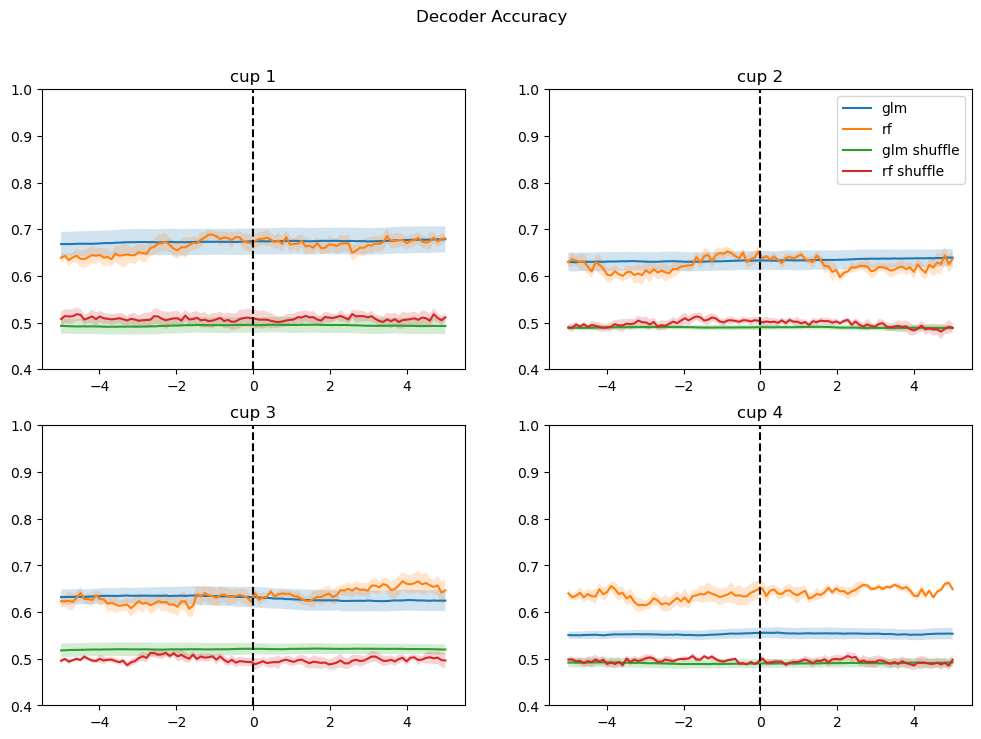

In [38]:
loc_auc = location_analysis.trial_decoder(equalize = 5,
                                pre_window = 5, 
                                post_window = 0,
                                num_fold = 5,
                                num_shuffle = 5,
                                no_PCs = 8, 
                                events = ['cup 1', 'cup 2', 'cup 3', 'cup 4'],
                                plot = True)


In [48]:
# with open('loc_auc.pkl','wb') as file:
#     pickle.dump(loc_auc, file)

In [49]:
with open('loc_auc.pkl', 'rb') as file:
    loc_auc = pickle.load(file)

### Probaiblity plotting

In [ ]:
#assign cups to social agents



In [71]:
def __PCA_for_decoding_tagged_(equalize, pre_window, post_window, no_PCs, events, counter_events = None):
        full_PCA_matrix, t_df, key, coefficients, explained_variance_ratios = phase3_analysis.PCA_matrix_generation(equalize, pre_window, post_window, events = events)
        total_variance = 0
        for var in explained_variance_ratios[0:10]:
            total_variance =+ total_variance + var
            print(total_variance)
        recordings = full_PCA_matrix.columns.to_list()
        recording_list = np.unique(recordings)
        coefficients = coefficients[:, :no_PCs]
        recording_indices = get_indices(recordings)
        decoder_data = []
        if counter_events is not None:
            for event in counter_events:
                if event not in events:
                    events.append(event)
        #decoder data dict: events for keys, values is a list of len(events)
        #each element in the list is the transformed matrix
        for recording in recording_list:
            #iterate through recording
            start = recording_indices[recording][0]
            stop = recording_indices[recording][1]
            #trim weight matrix for only those neurons in the current recording
            subset_coeff = coefficients[start:stop+1, :]
            recording_instance = phase3_analysis.ephyscollection.get_by_name(recording)
            recording_data = {}
            for event in events:
                #grab all event firing rates for current event in current recording
                event_firing_rates = phase3_analysis.__get_event_firing_rates__(recording_instance, event,
                                                                equalize, pre_window, post_window)
                for trial in range(len(event_firing_rates)):
                    #iterate through each event
                    trial_data = np.transpose(event_firing_rates[trial])
                    #transpoe event firing rates from neurons x timebins to timebins x neurons
                    transformed_trial = np.dot(trial_data, subset_coeff)
                    #transform each trial with original weight matrix
                    #T (timebins x pcs) = D (timebins x neurons). W (pcs x neurons) 

                    decoder_data.append([transformed_trial, event, recording_instance.cup_order[event]])
        return decoder_data 
 

 
def decode_id_w_location_labels(equalize, pre_window, post_window, num_fold, num_shuffle, no_PCs, events, plot = True):
    decoder_data = __PCA_for_decoding_tagged_(equalize, pre_window, post_window, no_PCs, events = events)
    #decoder data = list(timebins x pcs)
    T = (equalize + pre_window + post_window) * 1000 / phase3_analysis.timebin
    auc = {}
    prob = {}
    for event in events:
        data_neg = []
        data_pos = []
        pos_cup_labels = []
        neg_cup_labels = []
        neg_events = np.setdiff1d(events, event)
        for trial in decoder_data:
            if trial[1] == event:
                data_pos.append(trial[0])
                pos_cup_labels.append(trial[2])
            if trial[1] in neg_events:
                data_neg.append(trial[0])
                neg_cup_labels.append(trial[2])
        data_pos = np.stack(data_pos, axis=2)
        data_neg = np.stack(data_neg, axis=2)
        neg_cup_labels = np.array(neg_cup_labels)
        pos_cup_labels = np.array(pos_cup_labels)
        num_pos = data_pos.shape[2]
        num_neg = data_neg.shape[2]
        shuffle_pos = np.random.permutation(num_pos)
        shuffle_neg = np.random.permutation(num_neg)
        new_pos_labels = pos_cup_labels[shuffle_pos]
        new_neg_labels = neg_cup_labels[shuffle_neg]
        data_pos = data_pos[:, :, shuffle_pos]
        data_neg = data_neg[:, :, shuffle_neg]
        auc[event] = {'glm': [], 'rf': [],
                        'glm_shuffle': [], 'rf_shuffle': []}
        prob[event] = {'glm': [], 'rf': [], 
                        'glm_shuffle': [], 'rf_shuffle': [], 'cup labels': [], 'id labels': []}
        for fold in range(num_fold):
            auc_glm = []
            auc_rf = []
            auc_glm_shuffle = []
            auc_rf_shuffle = []
            prob_glm = []
            prob_rf = []
            prob_glm_shuffle = []
            prob_rf_shuffle = []
            pos_fold = num_pos // num_fold
            neg_fold = num_neg // num_fold
            data_test = np.concatenate((data_pos[:, :, fold * pos_fold:(fold + 1) * pos_fold],
                                        data_neg[:, :, fold * neg_fold:(fold + 1) * neg_fold]), axis=2)
            label_test = np.concatenate((np.ones((fold + 1) * pos_fold - fold * pos_fold),
                                        np.zeros((fold + 1) * neg_fold - fold * neg_fold)))
            label_cup = np.concatenate(
                [new_pos_labels[fold * pos_fold:(fold + 1) * pos_fold],
                new_neg_labels[fold * neg_fold:(fold + 1) * neg_fold]])
            data_train = np.concatenate((
                data_pos[:, :, np.setdiff1d(np.arange(num_pos), 
                np.arange(fold * pos_fold, (fold + 1) * pos_fold))],
                data_neg[:, :, np.setdiff1d(np.arange(num_neg), 
                np.arange(fold * neg_fold, (fold + 1) * neg_fold))]),
                axis=2)
            label_train = np.concatenate((np.ones(num_pos - (fold + 1) * pos_fold + fold * pos_fold),
                                        np.zeros(num_neg - (fold + 1) * neg_fold + fold * neg_fold)))
            for timebin in range(int(T)):
                model_glm = LogisticRegression(class_weight='balanced')
                model_glm.fit(data_train[timebin, :, :].T, label_train)
                pred_glm = model_glm.predict_proba(data_test[timebin, :, :].T)
                prob_glm.append(pred_glm[:,1])
                auc_glm.append(roc_auc_score(label_test, pred_glm[:, 1]))
                auc_test = roc_auc_score(label_test, pred_glm[:, 1])
        
                model_rf = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight = 'balanced'), n_estimators=50, random_state=0)
                model_rf.fit(data_train[timebin, :, :].T, label_train)
                pred_rf = model_rf.predict_proba(data_test[timebin, :, :].T)
                prob_rf.append(pred_rf[:,1])
                auc_rf.append(roc_auc_score(label_test, pred_rf[:, 1]))
            auc[event]['glm'].append(auc_glm)
            auc[event]['rf'].append(auc_rf)
            prob[event]['glm'].append(prob_glm)
            prob[event]['rf'].append(prob_rf)
            prob[event]['cup labels'].append(label_cup)
            prob[event]['id labels'].append(label_test)
            for shuffle in range(num_shuffle):
                temp_glm_shuffle = []
                temp_rf_shuffle = []
                temp_prob_glm_shuffle = []
                temp_prob_rf_shuffle = [] 
                label_train = np.random.permutation(label_train)
                for timebin in range(int(T)):
                    model_glm = LogisticRegression(class_weight='balanced')
                    model_glm.fit(data_train[timebin, :, :].T, label_train)
                    pred_glm = model_glm.predict_proba(data_test[timebin, :, :].T)
                    temp_prob_glm_shuffle.append(pred_glm[:,1])
                    temp_glm_shuffle.append(roc_auc_score(label_test, pred_glm[:, 1]))

                    model_rf = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight = 'balanced'), n_estimators=50, random_state=0)
                    model_rf.fit(data_train[timebin, :, :].T, label_train)
                    pred_rf = model_rf.predict_proba(data_test[timebin, :, :].T)
                    temp_prob_rf_shuffle.append(pred_rf[:,1])
                    temp_rf_shuffle.append(roc_auc_score(label_test, pred_rf[:, 1]))
                auc_glm_shuffle.append(temp_glm_shuffle)
                auc_rf_shuffle.append(temp_rf_shuffle)
                prob_glm_shuffle.append(temp_prob_glm_shuffle)
                prob_rf_shuffle.append(temp_prob_rf_shuffle)
            auc[event]['glm_shuffle'].append(auc_glm_shuffle)
            auc[event]['rf_shuffle'].append(auc_rf_shuffle)
            prob[event]['glm_shuffle'].append(prob_glm_shuffle)
            prob[event]['rf_shuffle'].append(prob_rf_shuffle)
    if plot:
        phase3_analysis.__plot_auc__(auc, equalize, pre_window)
    for events in prob.values():
        for model, data in events.items():
            data = np.array(data)
            events[model] = data
    for events in auc.values():
        for model, data in events.items():
            events[model] = np.array(data)
    return [auc, prob]


 


All set to analyze
0.5580951038794589
0.9302349288278763
0.9603454656499453
0.9795079948214417
0.9886992928469914
0.9924595324492581
0.9944142846763078
0.995939423384215
0.9969441846868844
0.9977306352172466


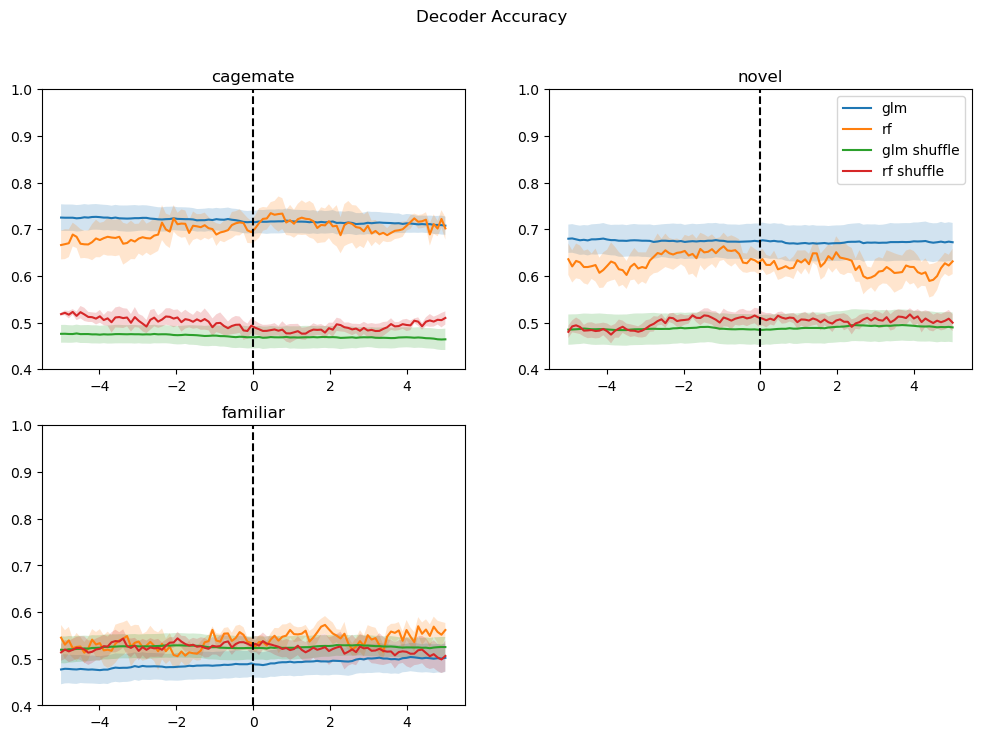

In [72]:
phase3_analysis =spike.SpikeAnalysis_MultiRecording(phase3_collection, 250,100,0.5)
[auc,prob] = decode_id_w_location_labels(equalize = 5,
                                    pre_window = 5,
                                    post_window = 0,
                                    num_fold = 5,
                                    num_shuffle = 5,
                                    no_PCs = 6, 
                                    events = ['cagemate', 'novel', 'familiar'],
                                    plot = True)
                                

0.5580951038794589
0.9302349288278763
0.9603454656499453
0.9795079948214417
0.9886992928469914
0.9924595324492581
0.9944142846763078
0.995939423384215
0.9969441846868844
0.9977306352172466


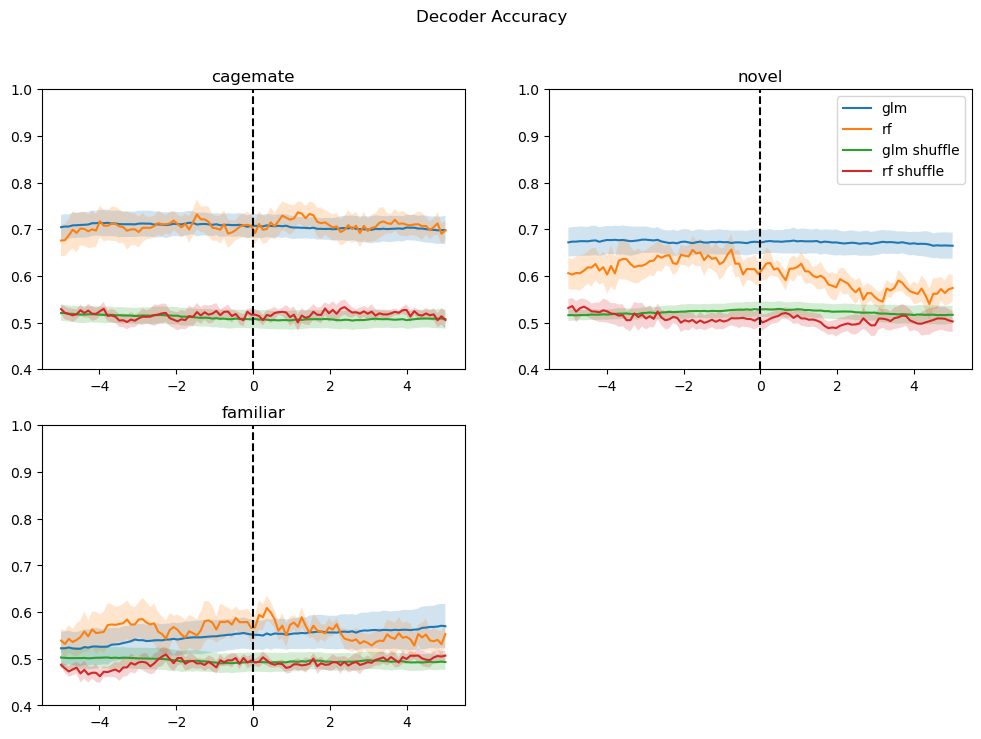

In [84]:
[auc_8pc,prob_8pc] = decode_id_w_location_labels(equalize = 5,
                                    pre_window = 5,
                                    post_window = 0,
                                    num_fold = 5,
                                    num_shuffle = 5,
                                    no_PCs = 8, 
                                    events = ['cagemate', 'novel', 'familiar'],
                                    plot = True)
                                

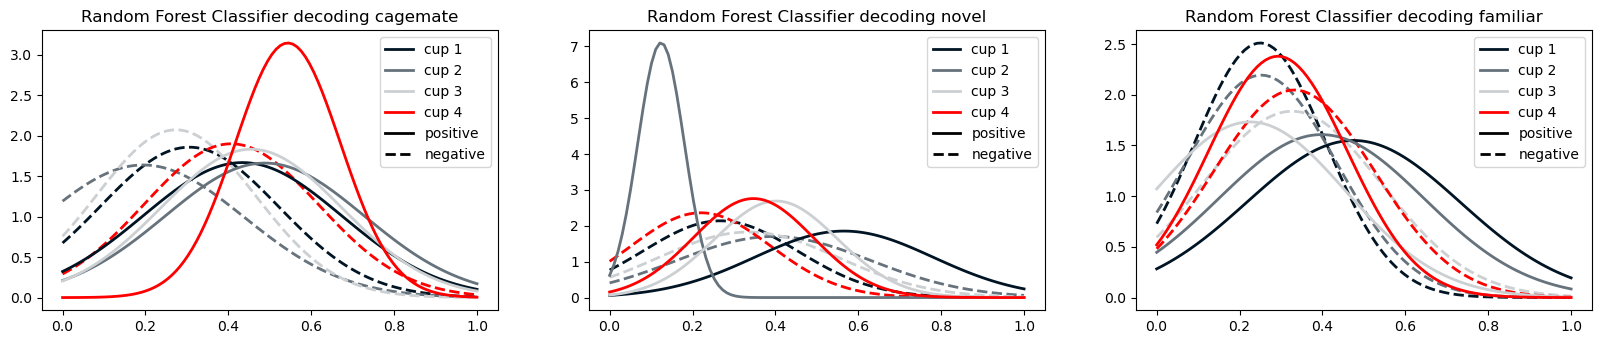

In [79]:
from scipy.stats import norm
prob_dict = prob
avg_prob = {}
no_plots = len(prob_dict.keys())
height_fig = math.ceil(no_plots/2)
i = 1
color_dict = {'cup 1': hex_2_rgb('#001424'), 'cup 2': hex_2_rgb('#66727c'), 'cup 3': hex_2_rgb('#ccd0d3'), 'cup 4': 'r'}
line_dict = {'positive': '-', 'negative':'--'}
plt.figure(figsize=(20,4*height_fig))
for key in prob_dict.keys():
    plt.subplot(height_fig,3,i)
    #average across timebins
    glm_avg = prob_dict[key]['glm'][:,99,:]
    #flatten across folds
    glm_avg = glm_avg.flatten()
    rf_avg = np.mean(prob_dict[key]['rf'], axis = 1)
    rf_avg = rf_avg.flatten()
    glm_shuffle_avg = np.mean(np.mean(prob_dict[key]['glm_shuffle'], axis = 1), axis = 1)
    glm_shuffle_avg = glm_shuffle_avg.flatten()
    rf_shuffle_avg = np.mean(np.mean(prob_dict[key]['rf_shuffle'], axis = 1), axis = 1)
    rf_shuffle_avg = rf_shuffle_avg.flatten()
    labels = prob_dict[key]['cup labels'].flatten()
    id_labels = prob_dict[key]['id labels'].flatten()
    for id_type in np.unique(id_labels):
        id_mask = (id_labels == id_type)
        labels_temp = labels[id_mask]
        rf_avg_temp = rf_avg[id_mask]
        for label in np.unique(labels):
            if id_type == 0.0:
                id_label = f'Not {key}'
                edgecolor_id = 'black'
                id_linetype = '--'
            else:
                id_label = f'{key}'
                edgecolor_id = 'red'
                id_linetype = '-'
            time_mask = (labels_temp == label)
            rf_avg_temp_temp = rf_avg_temp[time_mask]
            x = np.linspace(0, 1, 100)
            p = norm.pdf(x, np.mean(rf_avg_temp_temp), np.std(rf_avg_temp_temp))
            #plt.hist(rf_avg_temp_temp, bins=30, density=True, edgecolor=edgecolor_id, alpha=0.7, label = f'{id_label}, {label}', color = color_dict[label])
            plt.plot(x, p, linewidth=2, linestyle = id_linetype, color = color_dict[label])
            exposure_labels = [plt.Line2D([0], [0], color=color_dict[label], lw=2, label=label) for label in color_dict]
            time_labels = [plt.Line2D([0], [0], linestyle=line_dict[label], color = 'k', lw=2, label=label) for label in line_dict]
            legend_labels = exposure_labels + time_labels
            plt.legend(handles=legend_labels)

    plt.title(f'Random Forest Classifier decoding {key}')
    i +=1
plt.show()

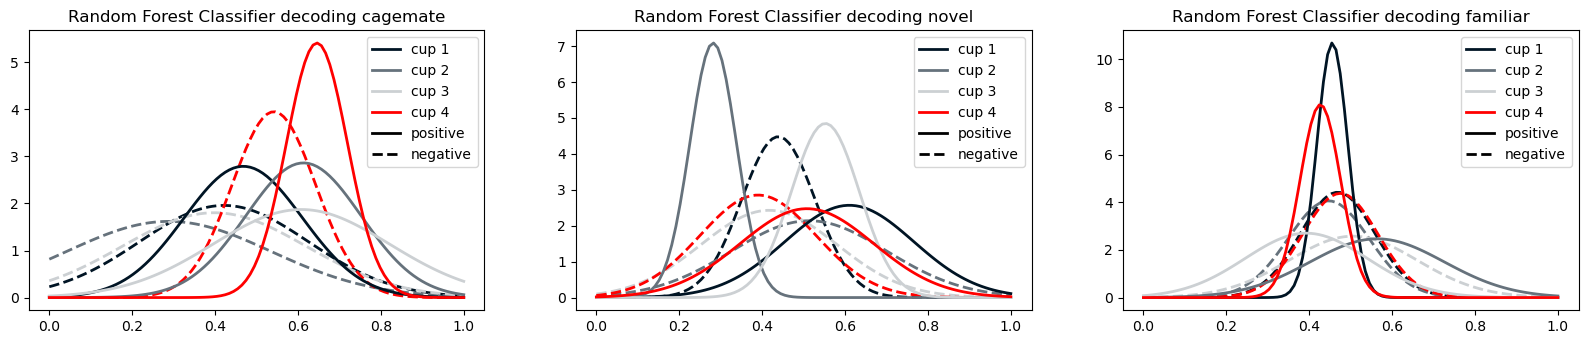

In [78]:
from scipy.stats import norm
prob_dict = prob
avg_prob = {}
no_plots = len(prob_dict.keys())
height_fig = math.ceil(no_plots/2)
i = 1
color_dict = {'cup 1': hex_2_rgb('#001424'), 'cup 2': hex_2_rgb('#66727c'), 'cup 3': hex_2_rgb('#ccd0d3'), 'cup 4': 'r'}
line_dict = {'positive': '-', 'negative':'--'}
plt.figure(figsize=(20,4*height_fig))
for key in prob_dict.keys():
    plt.subplot(height_fig,3,i)
    #average across timebins
    glm_avg = np.mean(prob_dict[key]['glm'], axis = 1)
    #flatten across folds
    glm_avg = glm_avg.flatten()
    labels = prob_dict[key]['cup labels'].flatten()
    id_labels = prob_dict[key]['id labels'].flatten()
    for id_type in np.unique(id_labels):
        id_mask = (id_labels == id_type)
        labels_temp = labels[id_mask]
        glm_avg_temp = glm_avg[id_mask]
        for label in np.unique(labels):
            if id_type == 0.0:
                id_label = f'Not {key}'
                edgecolor_id = 'black'
                id_linetype = '--'
            else:
                id_label = f'{key}'
                edgecolor_id = 'red'
                id_linetype = '-'
            time_mask = (labels_temp == label)
            glm_avg_temp_temp = glm_avg_temp[time_mask]
            x = np.linspace(0, 1, 100)
            p = norm.pdf(x, np.mean(glm_avg_temp_temp), np.std(glm_avg_temp_temp))
            #plt.hist(rf_avg_temp_temp, bins=30, density=True, edgecolor=edgecolor_id, alpha=0.7, label = f'{id_label}, {label}', color = color_dict[label])
            plt.plot(x, p, linewidth=2, linestyle = id_linetype, color = color_dict[label])
            exposure_labels = [plt.Line2D([0], [0], color=color_dict[label], lw=2, label=label) for label in color_dict]
            time_labels = [plt.Line2D([0], [0], linestyle=line_dict[label], color = 'k', lw=2, label=label) for label in line_dict]
            legend_labels = exposure_labels + time_labels
            plt.legend(handles=legend_labels)

    plt.title(f'Random Forest Classifier decoding {key}')
    i +=1
plt.show()

In [81]:
def __PCA_for_decoding_tagged_id_(equalize, pre_window, post_window, no_PCs, events, counter_events = None):
        full_PCA_matrix, t_df, key, coefficients, explained_variance_ratios = phase3_analysis.PCA_matrix_generation(equalize, pre_window, post_window, events = events)
        total_variance = 0
        for var in explained_variance_ratios[0:10]:
            total_variance =+ total_variance + var
            print(total_variance)
        recordings = full_PCA_matrix.columns.to_list()
        recording_list = np.unique(recordings)
        coefficients = coefficients[:, :no_PCs]
        recording_indices = get_indices(recordings)
        decoder_data = []
        if counter_events is not None:
            for event in counter_events:
                if event not in events:
                    events.append(event)
        #decoder data dict: events for keys, values is a list of len(events)
        #each element in the list is the transformed matrix
        for recording in recording_list:
            #iterate through recording
            start = recording_indices[recording][0]
            stop = recording_indices[recording][1]
            #trim weight matrix for only those neurons in the current recording
            subset_coeff = coefficients[start:stop+1, :]
            recording_instance = phase3_analysis.ephyscollection.get_by_name(recording)
            recording_data = {}
            for event in events:
                #grab all event firing rates for current event in current recording
                event_firing_rates = phase3_analysis.__get_event_firing_rates__(recording_instance, event,
                                                                equalize, pre_window, post_window)
                for trial in range(len(event_firing_rates)):
                    #iterate through each event
                    trial_data = np.transpose(event_firing_rates[trial])
                    #transpoe event firing rates from neurons x timebins to timebins x neurons
                    transformed_trial = np.dot(trial_data, subset_coeff)
                    #transform each trial with original weight matrix
                    #T (timebins x pcs) = D (timebins x neurons). W (pcs x neurons) 

                    decoder_data.append([transformed_trial, event, recording_instance.reverse_cup_order[event]])
        return decoder_data 

def decode_id_w_id_labels(equalize, pre_window, post_window, num_fold, num_shuffle, no_PCs, events, plot = True):
    decoder_data = __PCA_for_decoding_tagged_id_(equalize, pre_window, post_window, no_PCs, events = events)
    #decoder data = list(timebins x pcs)
    T = (equalize + pre_window + post_window) * 1000 / phase3_analysis.timebin
    auc = {}
    prob = {}
    for event in events:
        data_neg = []
        data_pos = []
        pos_cup_labels = []
        neg_cup_labels = []
        neg_events = np.setdiff1d(events, event)
        for trial in decoder_data:
            if trial[1] == event:
                data_pos.append(trial[0])
                pos_cup_labels.append(trial[2])
            if trial[1] in neg_events:
                data_neg.append(trial[0])
                neg_cup_labels.append(trial[2])
        data_pos = np.stack(data_pos, axis=2)
        data_neg = np.stack(data_neg, axis=2)
        neg_cup_labels = np.array(neg_cup_labels)
        pos_cup_labels = np.array(pos_cup_labels)
        num_pos = data_pos.shape[2]
        num_neg = data_neg.shape[2]
        shuffle_pos = np.random.permutation(num_pos)
        shuffle_neg = np.random.permutation(num_neg)
        new_pos_labels = pos_cup_labels[shuffle_pos]
        new_neg_labels = neg_cup_labels[shuffle_neg]
        data_pos = data_pos[:, :, shuffle_pos]
        data_neg = data_neg[:, :, shuffle_neg]
        auc[event] = {'glm': [], 'rf': [],
                        'glm_shuffle': [], 'rf_shuffle': []}
        prob[event] = {'glm': [], 'rf': [], 
                        'glm_shuffle': [], 'rf_shuffle': [], 'cup labels': [], 'id labels': []}
        for fold in range(num_fold):
            auc_glm = []
            auc_rf = []
            auc_glm_shuffle = []
            auc_rf_shuffle = []
            prob_glm = []
            prob_rf = []
            prob_glm_shuffle = []
            prob_rf_shuffle = []
            pos_fold = num_pos // num_fold
            neg_fold = num_neg // num_fold
            data_test = np.concatenate((data_pos[:, :, fold * pos_fold:(fold + 1) * pos_fold],
                                        data_neg[:, :, fold * neg_fold:(fold + 1) * neg_fold]), axis=2)
            label_test = np.concatenate((np.ones((fold + 1) * pos_fold - fold * pos_fold),
                                        np.zeros((fold + 1) * neg_fold - fold * neg_fold)))
            label_cup = np.concatenate(
                [new_pos_labels[fold * pos_fold:(fold + 1) * pos_fold],
                new_neg_labels[fold * neg_fold:(fold + 1) * neg_fold]])
            data_train = np.concatenate((
                data_pos[:, :, np.setdiff1d(np.arange(num_pos), 
                np.arange(fold * pos_fold, (fold + 1) * pos_fold))],
                data_neg[:, :, np.setdiff1d(np.arange(num_neg), 
                np.arange(fold * neg_fold, (fold + 1) * neg_fold))]),
                axis=2)
            label_train = np.concatenate((np.ones(num_pos - (fold + 1) * pos_fold + fold * pos_fold),
                                        np.zeros(num_neg - (fold + 1) * neg_fold + fold * neg_fold)))
            for timebin in range(int(T)):
                model_glm = LogisticRegression(class_weight='balanced')
                model_glm.fit(data_train[timebin, :, :].T, label_train)
                pred_glm = model_glm.predict_proba(data_test[timebin, :, :].T)
                prob_glm.append(pred_glm[:,1])
                auc_glm.append(roc_auc_score(label_test, pred_glm[:, 1]))
                auc_test = roc_auc_score(label_test, pred_glm[:, 1])
        
                model_rf = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight = 'balanced'), n_estimators=50, random_state=0)
                model_rf.fit(data_train[timebin, :, :].T, label_train)
                pred_rf = model_rf.predict_proba(data_test[timebin, :, :].T)
                prob_rf.append(pred_rf[:,1])
                auc_rf.append(roc_auc_score(label_test, pred_rf[:, 1]))
            auc[event]['glm'].append(auc_glm)
            auc[event]['rf'].append(auc_rf)
            prob[event]['glm'].append(prob_glm)
            prob[event]['rf'].append(prob_rf)
            prob[event]['id labels'].append(label_cup)
            prob[event]['cup labels'].append(label_test)
            for shuffle in range(num_shuffle):
                temp_glm_shuffle = []
                temp_rf_shuffle = []
                temp_prob_glm_shuffle = []
                temp_prob_rf_shuffle = [] 
                label_train = np.random.permutation(label_train)
                for timebin in range(int(T)):
                    model_glm = LogisticRegression(class_weight='balanced')
                    model_glm.fit(data_train[timebin, :, :].T, label_train)
                    pred_glm = model_glm.predict_proba(data_test[timebin, :, :].T)
                    temp_prob_glm_shuffle.append(pred_glm[:,1])
                    temp_glm_shuffle.append(roc_auc_score(label_test, pred_glm[:, 1]))

                    model_rf = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight = 'balanced'), n_estimators=50, random_state=0)
                    model_rf.fit(data_train[timebin, :, :].T, label_train)
                    pred_rf = model_rf.predict_proba(data_test[timebin, :, :].T)
                    temp_prob_rf_shuffle.append(pred_rf[:,1])
                    temp_rf_shuffle.append(roc_auc_score(label_test, pred_rf[:, 1]))
                auc_glm_shuffle.append(temp_glm_shuffle)
                auc_rf_shuffle.append(temp_rf_shuffle)
                prob_glm_shuffle.append(temp_prob_glm_shuffle)
                prob_rf_shuffle.append(temp_prob_rf_shuffle)
            auc[event]['glm_shuffle'].append(auc_glm_shuffle)
            auc[event]['rf_shuffle'].append(auc_rf_shuffle)
            prob[event]['glm_shuffle'].append(prob_glm_shuffle)
            prob[event]['rf_shuffle'].append(prob_rf_shuffle)
    if plot:
        phase3_analysis.__plot_auc__(auc, equalize, pre_window)
    for events in prob.values():
        for model, data in events.items():
            data = np.array(data)
            events[model] = data
    for events in auc.values():
        for model, data in events.items():
            events[model] = np.array(data)
    return [auc, prob]

0.5019241374765314
0.7796712653454755
0.9340859509468701
0.9563877230366499
0.9717203628625487
0.981400790747108
0.9887805266044585
0.991505064719976
0.9933274211962807
0.9950194069438341


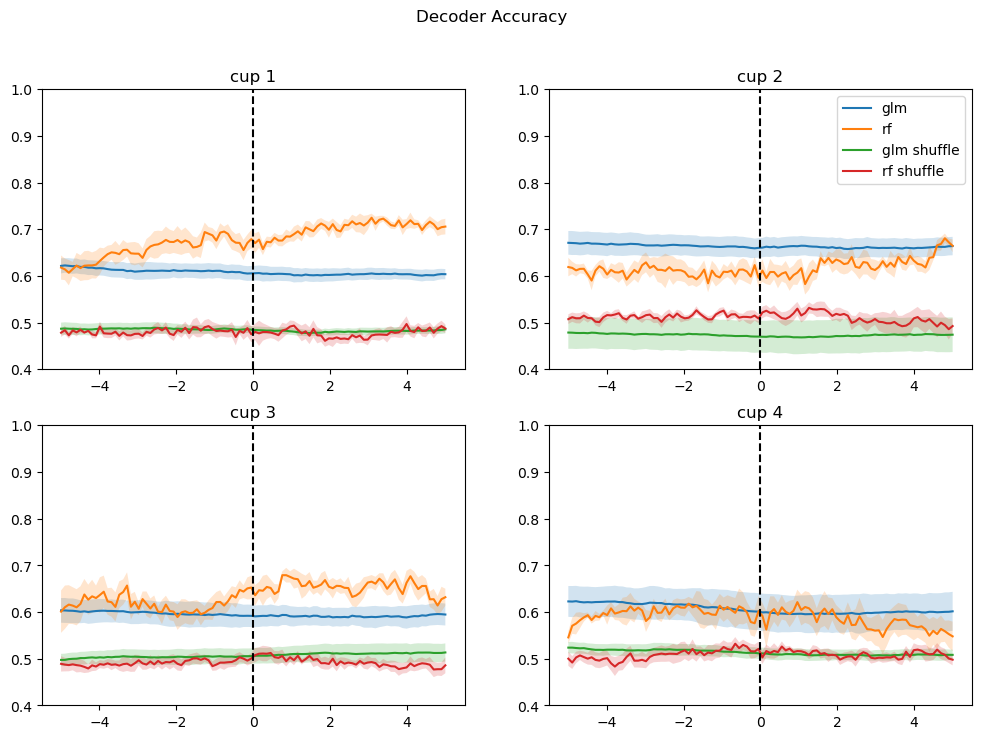

In [83]:
[auc_cup, prob_cup] = decode_id_w_id_labels(equalize = 5,
                                    pre_window = 5,
                                    post_window = 0,
                                    num_fold = 5,
                                    num_shuffle = 5,
                                    no_PCs = 8, 
                                    events = ['cup 1', 'cup 2', 'cup 3', 'cup 4'],
                                    plot = True)

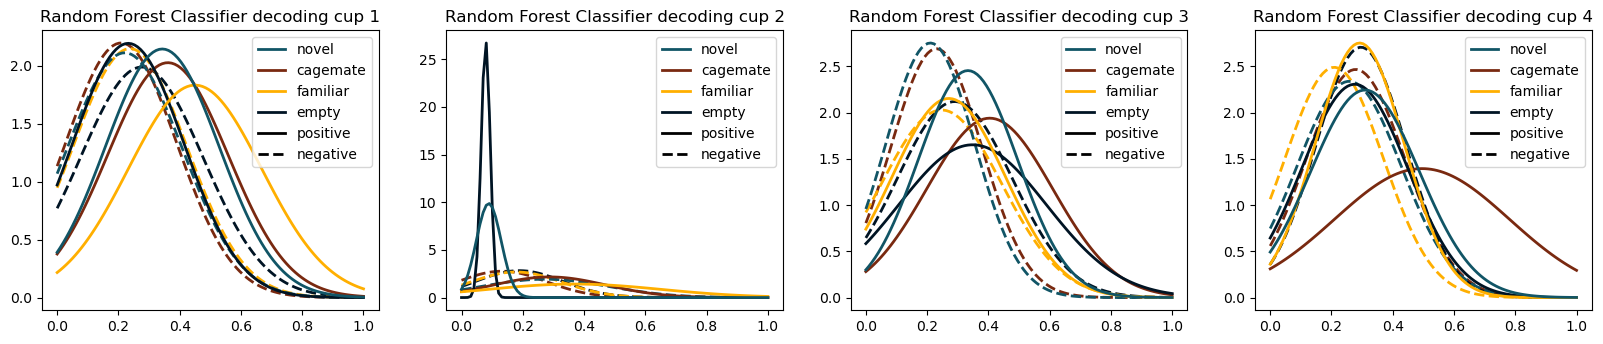

In [88]:
from scipy.stats import norm
prob_dict = prob_cup
avg_prob = {}
no_plots = len(prob_dict.keys())
height_fig = math.ceil(no_plots/2)
i = 1
color_dict = {'novel': hex_2_rgb('#115566'), 'cagemate': hex_2_rgb('#792910') , 'familiar': hex_2_rgb('#FFAF00'), 'empty':hex_2_rgb('#001424')}
line_dict = {'positive': '-', 'negative':'--'}
plt.figure(figsize=(20,4*height_fig))
for key in prob_dict.keys():
    plt.subplot(height_fig,4,i)
    #average across timebins
    rf_avg = np.mean(prob_dict[key]['rf'], axis = 1)
    rf_avg = rf_avg.flatten()
    labels = prob_dict[key]['id labels'].flatten()
    id_labels = prob_dict[key]['cup labels'].flatten()
    for id_type in np.unique(id_labels):
        id_mask = (id_labels == id_type)
        labels_temp = labels[id_mask]
        rf_avg_temp = rf_avg[id_mask]
        for label in np.unique(labels):
            if id_type == 0.0:
                id_label = f'Not {key}'
                edgecolor_id = 'black'
                id_linetype = '--'
            else:
                id_label = f'{key}'
                edgecolor_id = 'red'
                id_linetype = '-'
            time_mask = (labels_temp == label)
            rf_avg_temp_temp = rf_avg_temp[time_mask]
            x = np.linspace(0, 1, 100)
            p = norm.pdf(x, np.mean(rf_avg_temp_temp), np.std(rf_avg_temp_temp))
            #plt.hist(rf_avg_temp_temp, bins=30, density=True, edgecolor=edgecolor_id, alpha=0.7, label = f'{id_label}, {label}', color = color_dict[label])
            plt.plot(x, p, linewidth=2, linestyle = id_linetype, color = color_dict[label])
            exposure_labels = [plt.Line2D([0], [0], color=color_dict[label], lw=2, label=label) for label in color_dict]
            time_labels = [plt.Line2D([0], [0], linestyle=line_dict[label], color = 'k', lw=2, label=label) for label in line_dict]
            legend_labels = exposure_labels + time_labels
            plt.legend(handles=legend_labels)

    plt.title(f'Random Forest Classifier decoding {key}')
    i +=1
plt.show()

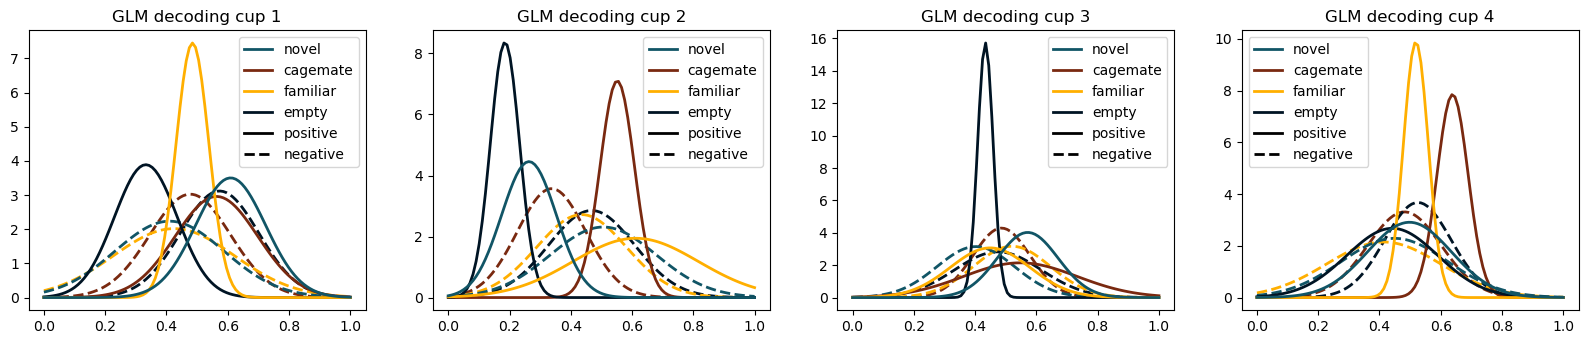

In [93]:
avg_prob = {}
no_plots = len(prob_dict.keys())
height_fig = math.ceil(no_plots/2)
i = 1
color_dict = {'novel': hex_2_rgb('#115566'), 'cagemate': hex_2_rgb('#792910') , 'familiar': hex_2_rgb('#FFAF00'), 'empty':hex_2_rgb('#001424')}
line_dict = {'positive': '-', 'negative':'--'}
plt.figure(figsize=(20,4*height_fig))
for key in prob_dict.keys():
    plt.subplot(height_fig,4,i)
    #average across timebins
    glm_avg = np.mean(prob_dict[key]['glm'], axis = 1)
    glm_avg = glm_avg.flatten()
    labels = prob_dict[key]['id labels'].flatten()
    id_labels = prob_dict[key]['cup labels'].flatten()
    for id_type in np.unique(id_labels):
        id_mask = (id_labels == id_type)
        labels_temp = labels[id_mask]
        glm_avg_temp = glm_avg[id_mask]
        for label in np.unique(labels):
            if id_type == 0.0:
                id_label = f'Not {key}'
                edgecolor_id = 'black'
                id_linetype = '--'
            else:
                id_label = f'{key}'
                edgecolor_id = 'red'
                id_linetype = '-'
            time_mask = (labels_temp == label)
            glm_avg_temp_temp = glm_avg_temp[time_mask]
            x = np.linspace(0, 1, 100)
            p = norm.pdf(x, np.mean(glm_avg_temp_temp), np.std(glm_avg_temp_temp))
            #plt.hist(glm_avg_temp_temp, bins=30, density=True, edgecolor=edgecolor_id, alpha=0.7, label = f'{id_label}, {label}', color = color_dict[label])
            plt.plot(x, p, linewidth=2, linestyle = id_linetype, color = color_dict[label])
            exposure_labels = [plt.Line2D([0], [0], color=color_dict[label], lw=2, label=label) for label in color_dict]
            time_labels = [plt.Line2D([0], [0], linestyle=line_dict[label], color = 'k', lw=2, label=label) for label in line_dict]
            legend_labels = exposure_labels + time_labels
            plt.legend(handles=legend_labels)

    plt.title(f'GLM decoding {key}')
    i +=1
plt.show()